# <center><font color=#0404B4>**ĐỒ ÁN CUỐI KÌ - PHÂN TÍCH DỮ LIỆU THÔNG MINH** </font></center>

## <center><font color=#0404B4><strong>Natural Language Processing with Disaster Tweets</strong> </font></center>

<div style="background-color:#0404B4; color:#FFFFFF; font-size:20px; font-family:Verdana; padding:10px; border: 0px solid #19180F; border-radius:10px"> 
    <strong><center>Bảng thành viên nhóm</center></strong>
</div>

|<center><div style="width:150px">MSSV</div><center>|<center><div style="width:290px">Họ và tên</div><center>|<center> Công việc thực hiện</center>|
|---------- |:-------------:|--------------------------------|
| <center>20120032<center>  | <center>Phan Trường An<center> |<center>Tìm hiểu và cài đặt mô hình BERT</center> |
| <center>20120037<center>  | <center>Trần Thị Minh Anh<center> |<center>Tìm hiểu và cài đặt mô hình LightGBM </center>|
| <center>20120041<center>  | <center>Trần Kim Bảo<center> |<center>Tiền xử lý, tìm hiểu và cài đặt mô hình LightGBM </center>|
| <center>20120053<center>  | <center>Nguyễn Thành Đạt<center>|<center> Khám phá dữ liệu, tìm hiểu và cài đặt mô hình BERT, tổng hợp notebook</center>|
| <center>20120071<center>  |<center>Nguyễn Thị Bích Hà<center>|<center>Tìm hiểu mô hình LightGBM, tổng hợp notebook</center>|
| <center>20120095<center>  | <center>Ngô Quang Hưng<center> |<center>Khám phá dữ liệu, tìm hiểu và cài đặt mô hình BERT</center>|

<div style="background-color:#0404B4; color:#FFFFFF; font-size:20px; font-family:Verdana; padding:10px; border: 0px solid #19180F; border-radius:10px"> 
    <strong><center>Mô tả bài toán</center></strong>
</div>
<br>


### <font color=#0404B4> Giới thiệu  </font>
Twitter đã trở thành một kênh truyền thông quan trọng trong các tình huống khẩn cấp. Sự phổ biến của điện thoại thông minh cho phép mọi người thông báo về một tình huống khẩn cấp mà họ đang quan sát trong thời gian thực. Do đó, nhiều cơ quan quan tâm đến việc giám sát Twitter theo cách tự động (ví dụ: tổ chức cứu trợ thiên tai và các cơ quan thông tin).


### <font color=#0404B4> Yêu cầu  </font>
Bài toán yêu cầu xây dựng một mô hình học máy có khả năng dự đoán xem một Tweet có liên quan đến thảm họa thực sự hay không. Với dữ liệu ban đầu là một tập dữ liệu gồm 10.000 tweet đã được phân loại bằng tay. Và mục tiêu là dựa vào tập dữ liệu đã được phân loại đó, ta sẽ tiến hành dự đoán trên một tập dữ liệu khác.

<div style="background-color:#0404B4; color:#FFFFFF; font-size:20px; font-family:Verdana; padding:10px; border: 0px solid #19180F; border-radius:10px"> 
    <strong><center>Import thư viện</center></strong>
</div>

In [1]:
# !pip install locationtagger
# !pip install geotext
# !pip install geopy
# !pip install wordcloud
# !pip install matplotlib squarify
# !pip install WordCloud

# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
# !pip install transformers
# !pip install transformers[torch]
# !pip install accelerate -U
# !pip install datasets

# !pip install nltk
# !pip install pyspellchecker
# !pip install lightgbm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_theme()
pd.set_option("display.max_colwidth", 250)
from wordcloud import WordCloud
from geotext import GeoText
from geopy.geocoders import Nominatim
import squarify
import string
import plotly.graph_objs as go
from plotly.offline import iplot
import string
import nltk
from PIL import Image
import wordcloud
from wordcloud import STOPWORDS
import html
# from sklearn.metrics import f1_score

### Mô hình Bert

In [3]:
from transformers import AutoTokenizer
import torch
import requests
from bs4 import BeautifulSoup
import re
from transformers import Trainer,TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import DatasetDict,Dataset
from transformers import DataCollatorWithPadding
from torch import nn
from transformers import AutoModelForSequenceClassification
from datasets import load_metric

### Mô hình LightGBM

In [4]:
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
from spellchecker import SpellChecker
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<div style="background-color:#0404B4; color:#FFFFFF; font-size:20px; font-family:Verdana; padding:10px; border: 0px solid #19180F; border-radius:10px"> 
    <strong><center>Tiền xử lý dữ liệu</center></strong>
</div>

### <font color=#0404B4> 1. Đọc dữ liệu  </font>

#### Dữ liệu đã được train

In [5]:
train_df=pd.read_csv("train.csv")
train_df.shape

(7613, 5)

In [6]:
train_df.head()

id keyword location  \
0   1     NaN      NaN   
1   4     NaN      NaN   
2   5     NaN      NaN   
3   6     NaN      NaN   
4   7     NaN      NaN   

                                                                                                                                    text  \
0                                                                  Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all   
1                                                                                                 Forest fire near La Ronge Sask. Canada   
2  All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected   
3                                                                      13,000 people receive #wildfires evacuation orders in California    
4                                               Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school    

   target  
0       1  
1       1  
2       1  
3       1  
4       1

#### Dữ liệu dùng để dự đoán

In [7]:
test_df=pd.read_csv("test.csv")
test_df.shape

(3263, 4)

In [8]:
test_df.head()

id keyword location  \
0   0     NaN      NaN   
1   2     NaN      NaN   
2   3     NaN      NaN   
3   9     NaN      NaN   
4  11     NaN      NaN   

                                                                                               text  
0                                                                Just happened a terrible car crash  
1                                  Heard about #earthquake is different cities, stay safe everyone.  
2  there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all  
3                                                          Apocalypse lighting. #Spokane #wildfires  
4                                                     Typhoon Soudelor kills 28 in China and Taiwan

#### Mẫu bài nộp (Output mẫu)

In [9]:
sample_submission_df=pd.read_csv("sample_submission.csv")
sample_submission_df.shape

(3263, 2)

In [10]:
sample_submission_df.head()

id  target
0   0       0
1   2       0
2   3       0
3   9       0
4  11       0

### <font color=#0404B4> 2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?  </font>
- `train_df`: Thông tin của tweet trên tập huấn luyện bao gồm id, từ khóa, địa điểm gửi, nội dung và nhãn của tweet.
- `test_df`: Thông tin của tweet trên tập test bao gồm id, từ khóa, địa điểm gửi, nội dung.
- `sample_submission_df`: định dạng bài nộp.

### <font color=#0404B4> 3. Có dữ liệu bị trùng lặp ở các DataFrame hay không?  </font>

Ta sẽ kiểm tra xem có dòng nào ở mỗi DataFrame trùng lặp với nhau hay không.

In [11]:
def check_duplicated(dataframe):
    duplicated_rows = dataframe.duplicated()

    # In các hàng bị lặp lại
    if len(dataframe[duplicated_rows])>0:
        print('Có dòng dữ liệu bị lặp')
        display(dataframe[duplicated_rows])
    else:
        print('Không có dòng dữ liệu nào bị lặp')

**DataFrame `train_df`**

In [12]:
check_duplicated(train_df)

Không có dòng dữ liệu nào bị lặp


**DataFrame `test_df`**

In [13]:
check_duplicated(test_df)

Không có dòng dữ liệu nào bị lặp


**Dataframe `sample_submission_df`**

In [14]:
check_duplicated(sample_submission_df)

Không có dòng dữ liệu nào bị lặp


### <font color=#0404B4>  4. Mỗi cột có ý nghĩa gì? </font>

|<center>STT</center>|<center>Tên cột dữ liệu</center> | <center>Mô tả<center> | <center>Ghi chú</center> |
|--|:------:| ---| --- |
|1|id|<center>Định danh của tweet<center>|
|2|keyword| <center>Từ khóa được lấy từ tweet<center>|<center>Có thể thiếu</center>|
|3|location|<center>Địa điểm đăng tweet<center>|<center> Có thể thiếu</center>|
|4|text| <center>Nội dung của tweet<center>||
|5|target|<center>Nhãn được gán cho tweet<center>|<center>1: Thảm họa thực sự <br> 0: Không xảy ra thảm họa</center>|


### <font color=#0404B4>  5. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp? </font>

**DataFrame `train_df`**

In [15]:
train_df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


**Dataframe `test_df`**

In [17]:
test_df.columns

Index(['id', 'keyword', 'location', 'text'], dtype='object')

In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


#### **Nhận xét:**
Dựa vào ý nghĩa của id và kích thước của `train_df` và `test_df`, nhận thấy rằng chúng ta có thể merge dữ liệu ở 2 DataFrame để tạo thành 1 DataFrame mới: `tweet_df`, để tiện cho phần khám phá dữ liệu phía sau.

Ta sẽ tiến hành merge và lần lượt kiểm tra lại xem từng dòng dữ liệu có trùng lặp hay không.

In [19]:
tweet_df=pd.concat([train_df,test_df])

Sort lại DataFrame theo thứ tự của `id` để tiện quan sát

In [20]:
tweet_df=tweet_df.sort_values(by="id").reset_index(drop=True)

Kiểm tra xem có sự trùng lặp giữa các dòng hay không.

In [21]:
check_duplicated(tweet_df)

Không có dòng dữ liệu nào bị lặp


Sau khi merge, ta sẽ có một DataFrame mới hoàn chỉnh với các cột và thông tin bên dưới:

In [22]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10876 entries, 0 to 10875
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        10876 non-null  int64  
 1   keyword   10789 non-null  object 
 2   location  7238 non-null   object 
 3   text      10876 non-null  object 
 4   target    7613 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 425.0+ KB


### <font color=#0404B4>  6. Với mỗi cột, các giá trị được phân bố như thế nào? </font>
#### 6.1. Các cột có kiểu dữ liệu dạng numerical (số) và phân bố

In [23]:
numerical_cols = tweet_df[tweet_df.select_dtypes(exclude=['object']).columns]
numerical_cols.head(5)

id  target
0   0     NaN
1   1     1.0
2   2     NaN
3   3     NaN
4   4     1.0

Với các cột dữ liệu dạng số ta sẽ tính % dữ liệu thiếu, min, max. Kết quả được lưu vào DataFrame `nume_col_profiles_df` với:
- `missing_ratio`: % dữ liệu thiếu.
- `min`: giá trị nhỏ nhất.
- `max`: giá trị lớn nhất.

In [24]:
numerical_cols = tweet_df[tweet_df.select_dtypes(exclude=['object']).columns]

def missing_ratio(c):
    return  c.isna().sum()/len(c) * 100

def min(c):
    return c.min()

def max(c):
    return c.max()

nume_col_profiles_df = numerical_cols.agg([missing_ratio, min, max])
nume_col_profiles_df

id     target
missing_ratio      0.0  30.001839
min                0.0   0.000000
max            10875.0   1.000000

**Nhận xét:**
- `id`: Không có dữ liệu thiếu, ID tweet nhỏ nhất là 0, lớn nhất là 10875.
- `target`: Có 30% dữ liệu thiếu tương ứng với các tweet chưa được gán nhãn ở `test_df`.

#### 6.2. Cột có kiểu dữ liệu categorical (phân loại) và phân bố:


In [25]:
object_cols = tweet_df[tweet_df.select_dtypes(include=['object']).columns]
object_cols.head(5)

keyword location  \
0     NaN      NaN   
1     NaN      NaN   
2     NaN      NaN   
3     NaN      NaN   
4     NaN      NaN   

                                                                                               text  
0                                                                Just happened a terrible car crash  
1                             Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all  
2                                  Heard about #earthquake is different cities, stay safe everyone.  
3  there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all  
4                                                            Forest fire near La Ronge Sask. Canada

Với các cột categorical, ta tính tỉ lệ % dữ liệu thiếu, số lượng giá trị khác nhau, phân bố của các giá trị khác nhau. Kết quả được lưu vào DataFrame `cate_col_profiles_df` với:
- `missing_ratio`: % dữ liệu thiếu
- `num_diff_vals`: số lượng giá trị khác nhau <em>(không xét giá trị thiếu)</em>
- `ratio_diff_vals`: phân bố của các giá trị khác nhau <em>(không xét giá trị thiếu)</em>.

In [26]:
def num_diff_vals(col):
    return len(col.value_counts())

def ratio_diff_vals(col):
    return np.round(col.value_counts(normalize=True),2).to_dict()

cate_col_profiles_df=object_cols.agg([missing_ratio,num_diff_vals,ratio_diff_vals])
cate_col_profiles_df

keyword  \
missing_ratio                                                                                                                                                                                                                                                     0.799926   
num_diff_vals                                                                                                                                                                                                                                                          221   
ratio_diff_vals  {'ablaze': 0.0, 'lava': 0.0, 'loud%20bang': 0.0, 'mass%20murder': 0.0, 'massacre': 0.0, 'mayhem': 0.0, 'meltdown': 0.0, 'military': 0.0, 'mudslide': 0.0, 'natural%20disaster': 0.0, 'nuclear%20disaster': 0.0, 'nuclear%20reactor': 0.0, 'obliterate'...   

                                                                                                                                                                                                                                                                  location  \
missing_ratio                                                                                                                                                                                                                                                    33.449798   
num_diff_vals                                                                                                                                                                                                                                                         4521   
ratio_diff_vals  {'USA': 0.02, 'New York': 0.02, 'United States': 0.01, 'London': 0.01, 'Canada': 0.01, 'Nigeria': 0.01, 'India': 0.0, 'Worldwide': 0.0, 'Los Angeles, CA': 0.0, 'UK': 0.0, 'Kenya': 0.0, 'Washington, DC': 0.0, 'Mumbai': 0.0, 'United Kingdom': 0.0, ...   

                                                                                                                                                                                                                                                                      text  
missing_ratio                                                                                                                                                                                                                                                          0.0  
num_diff_vals                                                                                                                                                                                                                                                        10678  
ratio_diff_vals  {'11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...': 0.0, '#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestna...

**Nhận xét:**
- `location`: xuất hiện nhiều tweet không có địa chỉ đăng (33,45%) và số lượng địa điểm lớn: 4521 địa điểm.
- `keyword`: vẫn xuất hiện các tweet không trích dẫn được từ khóa và số lượng không quá lớn: 221 cụm từ khóa.
- `text`: Không bị thiếu dữ liệu nhưng số lượng nội dung chỉ là 10678 < 10875 (số lượng bài tweet). Có thể là do một số sự kiện hoặc vấn đề nào đó.

### <font color=#0404B4>  7. Có cột nào cần phải tiền xử lý hay không? </font>

**Nhận xét:**
- Qua kiểm tra dữ liệu, ta có thể thấy ở thuộc tính `location` có rất nhiều giá trị (4521 địa điểm) xấp xỉ bằng 1/2 tổng 2 tập `train_df` và `test_df` cộng lại. Thực hiện kiểm tra và xử lý về dạng chuẩn nhất có thể.

#### 7.1. Xóa các địa điểm bị lỗi ký tự, xuất hiện ký tự đặc biệt nhiều


Thực hiện xóa các hàm có ký tự đặc biệt nhiều hơn 1/4 so với độ dài của chuỗi. Và nếu trong cell đang xét có từ nào trên 2 ký tự thì thực hiện trả về *(Chỉ lấy 1 từ cuối)*

In [27]:
def del_special_string(c):
  if not(c is np.nan):
    special_char=re.sub('[\w^\s\.]+' ,'', c)
    scale=len(special_char)/len(c)
    if scale > 1/4:
      words=re.findall('[a-zA-Z]{2,}',c)
      if len(words)>0:
        return words[-1]
      return np.nan
    else:
      return c
  return np.nan

Thực hiện chạy hàm `del_special_string` cho tất cả các dữ liệu trong cột `location`.

In [28]:
tweet_df.location.apply(del_special_string).str.strip().replace('',np.nan).unique().__len__()

4352

In [29]:
tweet_df.location=tweet_df.location.apply(del_special_string).str.strip().replace('',np.nan)

Đếm số lần địa điểm được sử dụng

In [30]:
location_count_df=tweet_df.location.value_counts().to_frame().reset_index().rename(columns={"location":"counts","index":"location"})
location_count_df

location  counts
0                              USA     146
1                         New York     112
2                    United States      65
3                           London      60
4                          Nigeria      46
...                            ...     ...
4346        buenos aires argentina       1
4347    everydaynigerian@gmail.com       1
4348  Surulere Lagos,Home Of Swagg       1
4349            MontrÌ©al, QuÌ©bec       1
4350                       Lincoln       1

[4351 rows x 2 columns]

In [31]:
location_array=location_count_df.location

#### 7.2.  Lọc các dữ liệu có tên thành phố hoặc tên quốc gia

- Trích những tên thành phố và quốc gia *(đúng chuẩn)*

Tạo DataFrame chứa thông tin: thành phố và quốc gia dựa trên các địa chỉ *(unique)*

In [32]:
location_dict={"city":[],"country":[]}
for location_str in location_array:

  if isinstance(location_str, str):
    places = GeoText(location_str)

    if len(places.cities)>0:
      if len(places.cities)>1:
        result=', '.join(places.cities)
        location_dict["city"].append(result)
      else :
        location_dict["city"].append(places.cities[0])
    else :
        location_dict["city"].append(np.nan)

    if len(places.countries)>0:
      location_dict["country"].append(places.countries[0])
    else :
      location_dict["country"].append(np.nan)
  else:
    location_dict["city"].append(np.nan)
    location_dict["country"].append(np.nan)


In [33]:
location_df=pd.DataFrame(location_dict)
location_df

city        country
0          NaN            NaN
1     New York            NaN
2          NaN  United States
3       London            NaN
4          NaN        Nigeria
...        ...            ...
4346       NaN            NaN
4347       NaN            NaN
4348       NaN            NaN
4349       NaN            NaN
4350   Lincoln            NaN

[4351 rows x 2 columns]

- Điền tên quốc gia cho các tweet chỉ có tên thành phố

In [34]:
def get_country(city):
  if not (city is np.nan):
    geolocator = Nominatim(user_agent="my_app")
    location = geolocator.geocode(city)
    if location:
      return location.raw['display_name'].split(",")[-1].strip()
    return np.nan
  return np.nan

In [35]:
location_fill_country=location_df[~(location_df.city.isna()) & (location_df.country.isna())]

In [36]:
# Đã chạy và lưu kết quả vào file fill_country.csv
countries = location_fill_country.city.iloc[:5].apply(get_country)

location_df.loc[countries.index, 'country'] = countries.values
location_df

city         country
0          NaN             NaN
1     New York   United States
2          NaN   United States
3       London  United Kingdom
4          NaN         Nigeria
...        ...             ...
4346       NaN             NaN
4347       NaN             NaN
4348       NaN             NaN
4349       NaN             NaN
4350   Lincoln             NaN

[4351 rows x 2 columns]

Xuất file `fill_country.csv` sau khi đã điền để thuận tiện cho các lần chạy sau.

In [37]:
location_df["location"]=pd.Series(location_array)

In [38]:
location_df.to_csv("fill_country.csv",index=False,header=True)

Đọc lại dữ liệu từ `fill_country.csv`

In [39]:
location_df=pd.read_csv("fill_country.csv")
location_df

city         country                      location
0          NaN             NaN                           USA
1     New York   United States                      New York
2          NaN   United States                 United States
3       London  United Kingdom                        London
4          NaN         Nigeria                       Nigeria
...        ...             ...                           ...
4346       NaN             NaN        buenos aires argentina
4347       NaN             NaN    everydaynigerian@gmail.com
4348       NaN             NaN  Surulere Lagos,Home Of Swagg
4349       NaN             NaN            MontrÌ©al, QuÌ©bec
4350   Lincoln             NaN                       Lincoln

[4351 rows x 3 columns]

#### 7.3. Chuẩn hóa các thông tin bị trống cả tên thành phố và quốc gia

Lọc các tweet bị trống thông tin ở 2 cột thành phố và quốc gia.

In [40]:
location_nan_all_df=location_df[(location_df.city.isna()) & (location_df.country.isna())]
location_nan_all_df

city country                      location
0     NaN     NaN                           USA
7     NaN     NaN                     Worldwide
9     NaN     NaN                            UK
12    NaN     NaN                    California
20    NaN     NaN               California, USA
...   ...     ...                           ...
4344  NaN     NaN            todaysbigstock.com
4346  NaN     NaN        buenos aires argentina
4347  NaN     NaN    everydaynigerian@gmail.com
4348  NaN     NaN  Surulere Lagos,Home Of Swagg
4349  NaN     NaN            MontrÌ©al, QuÌ©bec

[2454 rows x 3 columns]

Hàm trả về tên quốc gia cho location chưa chuẩn hóa *(nếu có đề cập)*

In [41]:
def get_country_nan_all(c):
  geolocator = Nominatim(user_agent='myencoder', timeout=10)
  first = geolocator.geocode(c)
  if first:
    place=GeoText(first.address)
    if len(place.countries)<1:
      return first.raw['display_name'].split(",")[-1].strip()
    else :
      return place.countries[0]
  else :
    return np.nan

In [42]:
location_count_df[location_count_df.counts>1].counts.sum()

3514

**Nhận xét:**
- Thực hiện chuẩn hóa cho các địa điểm xuất hiện nhiều hơn 1 lần.
- Theo tìm hiểu để có thể lấy được tên các quốc gia chưa được chuẩn hóa trong ngôn ngữ tự nhiên. Nhóm quyết định xử dụng thư viện `geopy`: truy cập lấy từ API từ [OpenStreetMap Nominatim](https://nominatim.openstreermap.org). Cho phép lấy được cả các thông tin chưa được chuẩn hóa dựa trên gợi ý từ API. Tuy nhiên với điều khoản chỉ có thể lấy 1 địa chỉ trên giây và bị giới hạn số lần yêu cầu. Nên khó khăn trong việc chuẩn hóa toàn bộ.

In [43]:
len_NanCountrySuggest=location_count_df[location_count_df.counts>1].shape[0]

In [44]:
location_nan_all_df[location_nan_all_df.index<len_NanCountrySuggest]

city country           location
0    NaN     NaN                USA
7    NaN     NaN          Worldwide
9    NaN     NaN                 UK
12   NaN     NaN         California
20   NaN     NaN    California, USA
..   ...     ...                ...
719  NaN     NaN           far away
723  NaN     NaN          hyderabad
725  NaN     NaN                434
726  NaN     NaN  sydney, australia
728  NaN     NaN                302

[286 rows x 3 columns]

In [45]:
start_idx=0
end_idx=100
steps=100
n=0
while(True):
    if end_idx>n:
        countries = location_nan_all_df.location.iloc[start_idx:n].apply(get_country_nan_all)
        location_df.loc[countries.index, 'country'] = countries.values
        break
    countries = location_nan_all_df.location.iloc[start_idx:end_idx].apply(get_country_nan_all)
    location_df.loc[countries.index, 'country'] = countries.values
    print(end_idx)
    start_idx+=steps
    end_idx+=steps

Xuất file `fill_locatioin.csv` sau khi đã điền để thuận tiện cho các lần chạy sau.

In [46]:
location_df.to_csv("fill_location.csv",index=False,header=True)

In [47]:
location_nomalize_df=pd.read_csv("fill_location.csv")

In [48]:
location_nomalize_df.head(10)

city         country         location
0          NaN             NaN              USA
1     New York   United States         New York
2          NaN   United States    United States
3       London  United Kingdom           London
4          NaN         Nigeria          Nigeria
5          NaN          Canada           Canada
6          NaN           India            India
7          NaN             NaN        Worldwide
8  Los Angeles   United States  Los Angeles, CA
9          NaN             NaN               UK

In [49]:
location_nomalize_df.loc[location_nomalize_df.location=="Worldwide","country"]="Worldwide"

Thực hiện chuẩn hóa dữ liệu vào tập dữ liệu `train_df` và `test_df`.

In [50]:
train_df = train_df.merge(location_nomalize_df, how='left',on ="location")
test_df = test_df.merge(location_nomalize_df, how='left',on ="location")

In [51]:
train_df=train_df[["id", "keyword", "city", "country", "location", "text", "target"]]

In [52]:
train_df.head()

id keyword city country location  \
0   1     NaN  NaN     NaN      NaN   
1   4     NaN  NaN     NaN      NaN   
2   5     NaN  NaN     NaN      NaN   
3   6     NaN  NaN     NaN      NaN   
4   7     NaN  NaN     NaN      NaN   

                                                                                                                                    text  \
0                                                                  Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all   
1                                                                                                 Forest fire near La Ronge Sask. Canada   
2  All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected   
3                                                                      13,000 people receive #wildfires evacuation orders in California    
4                                               Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school    

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [53]:
test_df=test_df[["id", "keyword", "city", "country", "location", "text"]]

In [54]:
test_df.head()

id keyword city country location  \
0   0     NaN  NaN     NaN      NaN   
1   2     NaN  NaN     NaN      NaN   
2   3     NaN  NaN     NaN      NaN   
3   9     NaN  NaN     NaN      NaN   
4  11     NaN  NaN     NaN      NaN   

                                                                                               text  
0                                                                Just happened a terrible car crash  
1                                  Heard about #earthquake is different cities, stay safe everyone.  
2  there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all  
3                                                          Apocalypse lighting. #Spokane #wildfires  
4                                                     Typhoon Soudelor kills 28 in China and Taiwan

<div style="background-color:#0404B4; color:#FFFFFF; font-size:20px; font-family:Verdana; padding:10px; border: 0px solid #19180F; border-radius:10px"> 
    <strong><center>Khám phá dữ liệu</center></strong>
</div>

Ở phần khám phá dữ liệu này, ta sẽ tìm hiểu về một số thông tin insight thú vị của tập dữ liệu đã được huấn luyện trước. Phần này sẽ cung cấp một cái nhìn tổng quan hơn cho phần mô hình hóa phía sau.

### <font color=#0404B4>  Những keyword thường xuất hiện trong các Tweet với nội dung diễn tả thảm họa thật sự? </font>

**Bước 1:** Tiền xử lý dữ liệu bằng cách tiến hành lọc ra các sample có `keyword` không phải NaN và có `target` bằng 1 (disaster).

In [55]:
case1Train = train_df
trainTarget1= case1Train[case1Train['keyword'].notnull()]
trainTarget1= trainTarget1[trainTarget1['target']==1]
trainTarget1= trainTarget1[trainTarget1['keyword']!= ""]
trainTarget1.head()

id keyword        city country                   location  \
31  48  ablaze  Birmingham     NaN                 Birmingham   
33  50  ablaze         NaN     NaN                     AFRICA   
37  55  ablaze         NaN     NaN               World Wide!!   
38  56  ablaze         NaN     NaN                        NaN   
46  66  ablaze         NaN     NaN  GREENSBORO,NORTH CAROLINA   

                                                                                                                                            text  \
31                                                                                       @bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C   
33                                                            #AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi   
37                                                                                       INEC Office in Abia Set Ablaze - http://t.co/3ImaomknnA   
38  Barbados #Bridgetown JAMAICA ÛÒ Two cars set ablaze: SANTA CRUZ ÛÓ Head of the St Elizabeth Police Superintende...  http://t.co/wDUEaj8Q4J   
46                                             How the West was burned: Thousands of wildfires ablaze in California alone http://t.co/vl5TBR3wbr   

    target  
31       1  
33       1  
37       1  
38       1  
46       1

**Bước 2:** Ở bước này, ta sẽ dùng **Word cloud** để trực quan hóa. Việc trực quan này sẽ cho cung cấp cho chúng ta về một số keyword mà hễ nó có tồn tại trong text thì nghĩa là nó sẽ thực sự mô tả về một thiên tai.

Ta sẽ tiến hành lấy ra các keyword và lưu vào list `keywords` và ghép các keyword thành một chuỗi duy nhất, mỗi từ được ngăn cách bằng một khoảng trắng.

In [56]:
keywords = trainTarget1['keyword'].dropna().tolist()
text = ' '.join(keywords)

Tiếp đến ta tạo một đối tượng wordcloud với chuỗi vừa tạo.

In [57]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

Ta tiến hành trực quan ở bước này.

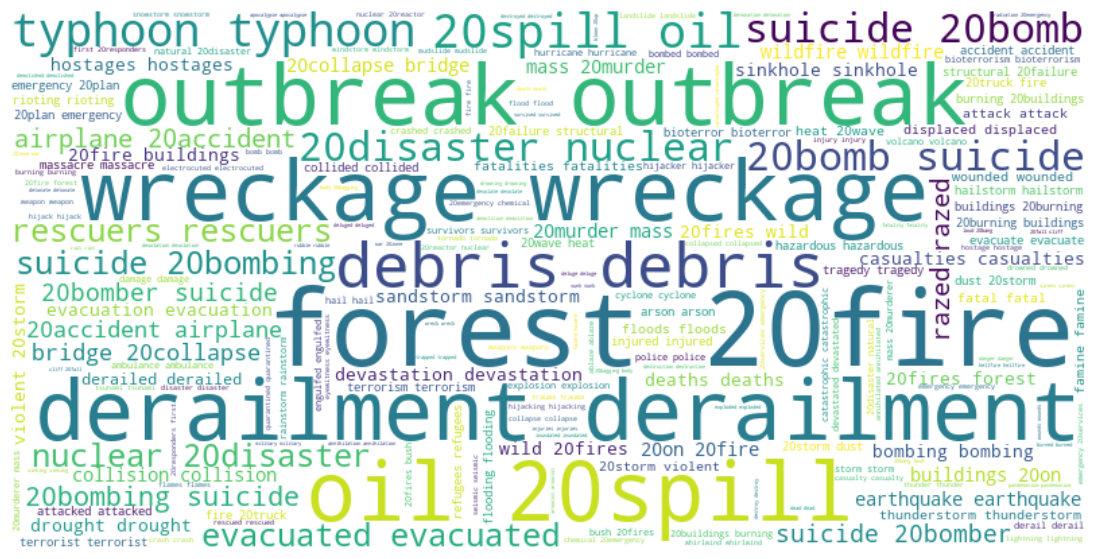

In [58]:
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Nhận xét:
- Một số keyword ta quan sát được từ Wordcloud rõ nhất bao gồm: 
    - **outbreak**: sự bùng nổ (thường diễn tả về một căn bệnh hoặc thảm họa nào đó)
    - **forest fire**: cháy rừng
    - **derailment**: sự mất phương hướng, tính hiệu hoặc sự mất kiểm soát
    - **burning buildings**: cháy nhà
    - **nuclear disaster**: thảm họa hạt nhân
    - **rescuers**: người tham gia vào hoạt động cứu hộ
    - **typhoon**: bão mạnh trong khu vực Tây Bắc Thái Bình Dương
    - **bombing**: đánh bom
    - **suicide**: tự tử
    - **spill oil**: rò rỉ dầu
    - **wreckage**, **debris**: các mảnh vụn hoặc đồ đạc đã bị phá hủy sau một sự kiện tai nạn hoặc thảm họa
    - **bridge collapse**: sập cầu
    - **evacuated**: việc di cư, sơ tán

**Bước 3:** Để có thể quan sát rõ hơn về số lần keyword xuất hiện, ta thêm 1 bước trực quan hóa dữ liệu bằng biểu đồ cột. Trong đó trục x thể hiện `keyword`, trục y thể hiện `số lần` keyword đó xuất hiện.

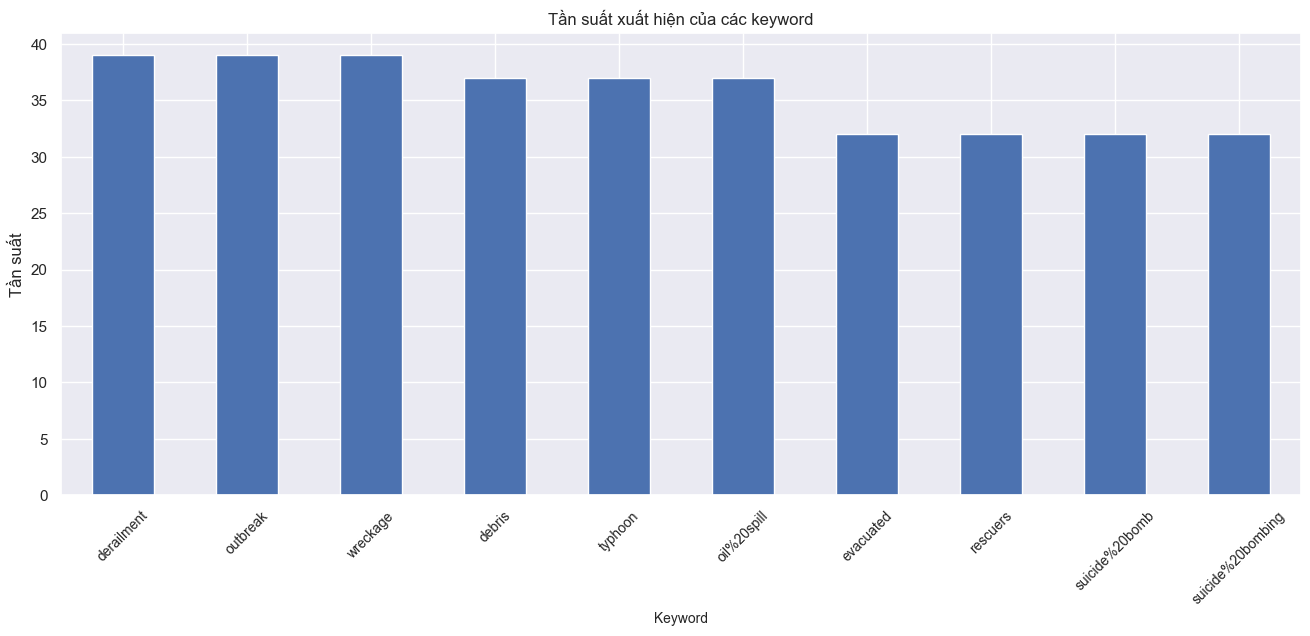

In [59]:
keywords_counts = trainTarget1['keyword'].value_counts().sort_values(ascending=False).head(10)

keywords_counts

# Plotting the bar chart
plt.figure(figsize=(16, 6))
keywords_counts.plot(kind='bar')
plt.xlabel('Keyword',fontsize=10)
plt.ylabel('Tần suất')
plt.title('Tần suất xuất hiện của các keyword')
plt.xticks(rotation=45,fontsize=10)
plt.show()

#### Nhận xét:
- Quan sát biểu đồ, số lần xuất hiện của mỗi keyword ở top 10 khá đồng đều, không có sự chênh lệch nhiều.
- Những keyword thường xuất hiện nhất mà ta thấy ở Wordcloud đều có tần suất rơi vào khoảng từ 35 đến 40 lần, chiếm không nhiều so với toàn bộ tập dữ liệu.

In [60]:
case2Train_1 = train_df.copy()
case2Train_1 = case2Train_1[case2Train_1['target']==1]
case2Train_1

id keyword city country location  \
0         1     NaN  NaN     NaN      NaN   
1         4     NaN  NaN     NaN      NaN   
2         5     NaN  NaN     NaN      NaN   
3         6     NaN  NaN     NaN      NaN   
4         7     NaN  NaN     NaN      NaN   
...     ...     ...  ...     ...      ...   
7608  10869     NaN  NaN     NaN      NaN   
7609  10870     NaN  NaN     NaN      NaN   
7610  10871     NaN  NaN     NaN      NaN   
7611  10872     NaN  NaN     NaN      NaN   
7612  10873     NaN  NaN     NaN      NaN   

                                                                                                                                           text  \
0                                                                         Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all   
1                                                                                                        Forest fire near La Ronge Sask. Canada   
2         All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected   
3                                                                             13,000 people receive #wildfires evacuation orders in California    
4                                                      Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school    
...                                                                                                                                         ...   
7608                                                        Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5   
7609              @aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.   
7610                                                                          M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ   
7611  Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.   
7612                                             The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d   

      target  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
7608       1  
7609       1  
7610       1  
7611       1  
7612       1  

[3271 rows x 7 columns]

### <font color=#0404B4> Địa điểm được ghi trong Tweet sẽ ảnh hưởng như thế nào đến việc phỏng đoán (target) cuối cùng? </font>


**Bước 1:** Tiền xử lý dữ liệu. Vì cột `location` có quá nhiều dữ liệu thiếu nên ta xử lý bằng cách phân ra, địa điểm đã biết và địa điểm chưa được xác định.

In [61]:
train_ex=train_df.copy()
train_ex['keyword']=train_ex['keyword'].fillna('Unknown')
train_ex['location']=train_ex['location'].fillna('Unknown')
train_ex['location']=train_ex['location'].apply(lambda x: 'Known' if x != 'Unknown' else x)

location_count=train_ex['location'].value_counts()
print(location_count)
location=location_count.keys()
lcount=location_count.values

Known      5078
Unknown    2535
Name: location, dtype: int64


**Bước 2:** Trực quan bằng `donut chart`. `Donut chart` rất phù hợp để quan sát tỉ lệ tweet có địa điểm đã biết và chưa biết.

In [62]:
pie_chart1=go.Pie(labels=location,values=lcount,hole=0.6)

my_layout=go.Layout(title='Biểu đồ biểu diễn tỉ lệ mức độ nghiêm trọng theo từng kiểu địa điểm',
                    height=500,width=800)

iplot({'data':pie_chart1, 'layout':my_layout})

**Nhận xét**:
- Quan sát biểu đồ, ta thấy lượng địa điểm chưa biết chiếm 1/3 so với tổng thể.
> Dữ liệu thiếu khá nhiều, cần trực quan kỹ hơn để đưa ra nhận xét. Ta xác định số lượng địa điểm biết và chưa biết dựa trên 2 nhóm tweet 1 và 0.


**Bước 3:** Tính các tham số cần thiết cho việc trực quan.

In [63]:
unknown=train_ex.loc[train_ex['location']=='Unknown']['target'].value_counts()
known=train_ex.loc[train_ex['location']=='Known']['target'].value_counts()
utarget=unknown.keys()
ucount=unknown.values
ktarget=known.keys()
kcount=known.values

target_count=train_ex['target'].value_counts()
target=target_count.keys()
tcount=target_count.values
total=sum(tcount)

**Bước 4**: Trực quan bằng `Nest chart`. `Nest chart` được dùng khi cần các mối quan hệ cha và con trong biểu đồ.

In [64]:
data = [
go.Pie(values=[tcount[1],tcount[0]],
    labels=[1,0],
    domain={'x':[0.2,0.8], 'y':[0.1,0.9]},
    hole=0.5,
    direction='clockwise',
    sort=False,
    marker={'colors':['#CB4335','#2E86C1']},
    ),
   
    go.Pie(values=[kcount[1],ucount[1],kcount[0],ucount[0]],
    labels=['Known-1','Unknown-1','Known-0','Unknown-0'],
    domain={'x':[0.1,0.9], 'y':[0,1]},
    hole=0.75,
    direction='clockwise',
    sort=False,
    marker={'colors':['#EC7063','#F1948A','#5DADE2','#85C1E9']},
    showlegend=False)]
my_layout = go.Layout(title='Biểu đồ biểu diễn tỉ lệ địa điểm có thông tin và chưa có thông tin dựa trên tweet 0 và 1',
                      height=500, width=800,
                      annotations=[{
                          'font': {
                              'size': 20
                          },
                          'showarrow': False,
                          'text':f'{total}',
                          'hovertext': f'Total: {total}',
                          'x': 0.5,
                          'y': 0.5,
                        
                      }])

fig = go.Figure(data=data, layout=my_layout)

iplot(fig)

**Nhận xét**:
- Với tweet 1 và tweet 0, lượng địa điểm đã biết có xu hướng cao hơn khoảng gấp đôi so với địa điểm chưa biết. Điều này cũng khá tương đồng với tỉ lệ khi trực quan tổng thể.
> Có thể kết luận rằng, số lượng địa điểm đã biết và chưa biết hầu như không có liên hệ với lượng tweet 0 và 1. 
>> Thử liên hệ cột `location` với cột `target` theo cách khác với tìm hiểu tiếp theo.

### <font color=#0404B4> Liệu có mối quan hệ nào giữa địa điểm và thiên tai xảy ra ở địa điểm đó hay không? </font>

**Bước 1:** Tiền xử lý dữ liệu bằng cách lọc ra các sample có `keyword` khác `NaN`, `target` bằng `1` và `location` khác `NaN`.

Ở bước này, ta sẽ dùng đến phần đã xử lý ở **Tiền xử lý**, cụ thể là DataFrame `location_count_df` để xem phân bố các địa điểm đăng các Tweet như thế nào. Do có quá nhiều địa điểm được liệt kê với số lượng không đáng kế (<=1), ta sẽ giới hạn lấy đúng 30 địa điểm xuất hiện nhiều nhất.

In [65]:
location_count_df_30 = location_count_df.head(30)
location_count_df_30

location  counts
0                 USA     146
1            New York     112
2       United States      65
3              London      60
4             Nigeria      46
5              Canada      44
6               India      35
7           Worldwide      35
8     Los Angeles, CA      34
9                  UK      33
10              Kenya      32
11     Washington, DC      31
12         California      28
13             Mumbai      28
14     United Kingdom      26
15        Los Angeles      26
16          Australia      26
17        Chicago, IL      24
18       New York, NY      23
19      San Francisco      23
20    California, USA      21
21            Florida      21
22                NYC      21
23  San Francisco, CA      20
24            Chicago      17
25          Indonesia      17
26   Washington, D.C.      17
27            Toronto      16
28        Philippines      15
29            Ireland      15

Do ở bước tiền xử lý, ta vẫn chưa thể xử lý dứt điểm các tên của cùng một địa điểm nhưng được viết dưới nhiều dạng khác nhau (viết tắt - viết đầy đủ). Và ở top 30 này:
- **United States** và **USA** là cùng một nước.
- **UK** và **United Kingdom** là cùng một nước.
- **Los Angeles, CA** và **Los Angeles** là một thành phố.
- **NYC**, **New York, NY** là một thành phố thuộc bang **New York**.
- **California** và **California, USA** là một bang.
- **Washington, D.C** và **Washington, DC** là một bang.
- **Chicago, IL** và **Chicago** là một thành phố.
- **San Francisco, CA** và **San Francisco** là một thành phố.

In [66]:
def combine_and_remove(df, location1, location2):
    # Kiểm tra nếu địa điểm 1 không tồn tại trong DataFrame
    if location1 not in df['location'].values:
        return df
    
    # Kiểm tra nếu địa điểm 2 không tồn tại trong DataFrame
    if location2 not in df['location'].values:
        return df
    
    # Cộng dồn số lần xuất hiện của hai địa điểm
    combined_count = df.loc[df['location'].isin([location1, location2]), 'counts'].sum()
    
    # Xóa địa điểm B
    df = df[df['location'] != location2]
    
    # Cập nhật số lần xuất hiện của địa điểm A với tổng đã cộng dồn
    df.loc[df['location'] == location1, 'counts'] = combined_count
    
    return df


location_pairs = [('United States', 'USA'), ('United Kingdom','UK'), ('Los Angeles, CA', 'Los Angeles'),
                 ('New York', 'NYC'), ('New York', 'New York, NY'), ('California', 'California, USA'), 
                  ('Washington, D.C.', 'Washington, DC'), ('Chicago', 'Chicago, IL'), ('San Francisco, CA', 'San Francisco')]

# Áp dụng sửa đổi cho từng cặp địa điểm trong danh sách
for location1, location2 in location_pairs:
    location_count_df_30 = combine_and_remove(location_count_df_30, location1, location2)

# In ra DataFrame mới
location_count_df_30

location  counts
1            New York     156
2       United States     211
3              London      60
4             Nigeria      46
5              Canada      44
6               India      35
7           Worldwide      35
8     Los Angeles, CA      60
10              Kenya      32
12         California      49
13             Mumbai      28
14     United Kingdom      59
16          Australia      26
21            Florida      21
23  San Francisco, CA      43
24            Chicago      41
25          Indonesia      17
26   Washington, D.C.      48
27            Toronto      16
28        Philippines      15
29            Ireland      15

Tiếp theo, ta sẽ dùng Tree map để trực quan cho việc phân bố này, cụ thể để xem xét tỉ lệ các Tweet thuộc về các địa điểm này.

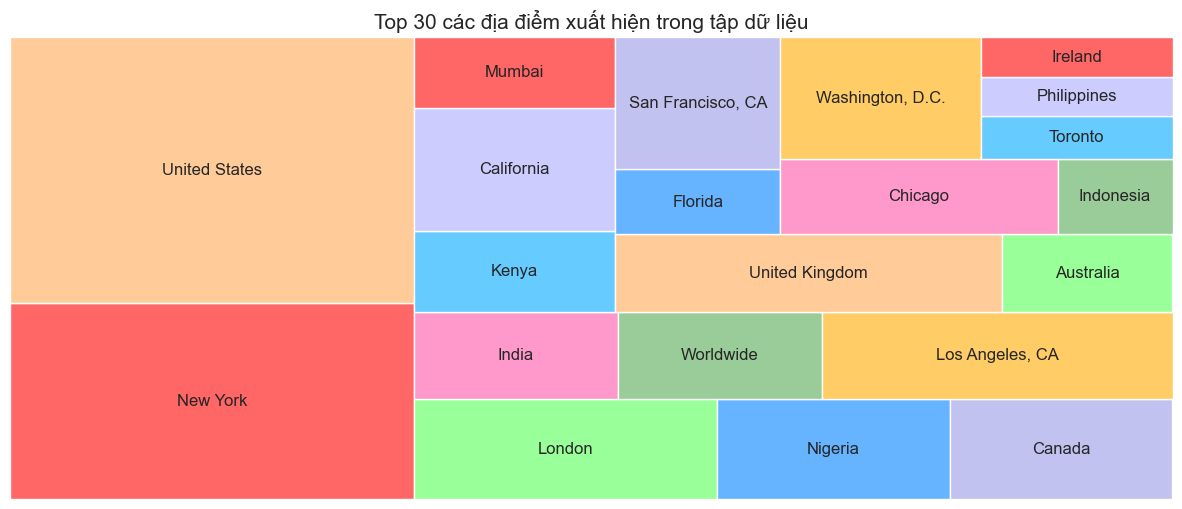

In [67]:
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff', '#c2c2f0',
          '#ff99cc', '#99cc99', '#ffcc66', '#66ccff', '#ccccff']
plt.figure(figsize=(15, 6))
squarify.plot(sizes=location_count_df_30['counts'], label=location_count_df_30['location'], color = colors)
plt.axis('off')
plt.title('Top 30 các địa điểm xuất hiện trong tập dữ liệu', fontsize=15)
plt.show()

#### Nhận xét:
- Đối với các Tweet có địa điểm kèm theo thì hầu hết đều đến từ United States, bên cạnh đó New York cũng chiếm một phần xấp xỉ gần bằng United States, mà đây lại là một bang của United States nên ta có thể gom lại và hiểu rằng phần lớn các Tweet trong top 30 địa điểm thường gặp đều đến từ địa điểm này.
- Vậy ta hãy thử tìm hiểu xem, ở United States thường diễn ra các thảm họa hay thiên tai gì dựa vào **keyword** được cung cấp.

**Bước 2**: Ta thêm 1 bước lấy ra các sample có `location` liên quan đến `USA`. Sau đó trực quan bằng biểu đồ cột, trục x thể hiện `keyword`, trục y thể hiện `số lần` keyword đó xuất hiện

In [68]:
case3Train = train_df
trainTarget3= case3Train[case3Train['keyword'].notnull()]
trainTarget3= trainTarget3[trainTarget3['target']==1]
trainTarget3= trainTarget3[trainTarget3['location'].notnull()]
trainTarget3.head()

id keyword        city country                   location  \
31  48  ablaze  Birmingham     NaN                 Birmingham   
33  50  ablaze         NaN     NaN                     AFRICA   
37  55  ablaze         NaN     NaN               World Wide!!   
46  66  ablaze         NaN     NaN  GREENSBORO,NORTH CAROLINA   
50  73  ablaze         NaN     NaN   Sheffield Township, Ohio   

                                                                                                 text  \
31                                            @bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C   
33                 #AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi   
37                                            INEC Office in Abia Set Ablaze - http://t.co/3ImaomknnA   
46  How the West was burned: Thousands of wildfires ablaze in California alone http://t.co/vl5TBR3wbr   
50                          Deputies: Man shot before Brighton home set ablaze http://t.co/gWNRhMSO8k   

    target  
31       1  
33       1  
37       1  
46       1  
50       1

Lấy ra các Tweet mà `Location` của nó có liên quan đến **USA** hoặc **United States**. Vì do trong tập dữ liệu còn bao gồm các thành phố, tiểu bang thuộc United States nhưng nhóm chưa tìm ra được cách để gom cả các địa điểm đó vào nên chỉ tạm quan sát trên các Tweet có địa điểm là USA hoặc United States.

In [69]:
trainTarget3 = trainTarget3[trainTarget3['location'].str.contains('USA|United States')]
keywords_counts = trainTarget3['keyword'].value_counts().sort_values(ascending=False).head(20)

Ta sẽ dùng Bar chart để biểu diễn số lượng của mỗi loại thảm họa (thiên tai) xảy ra ở United States.

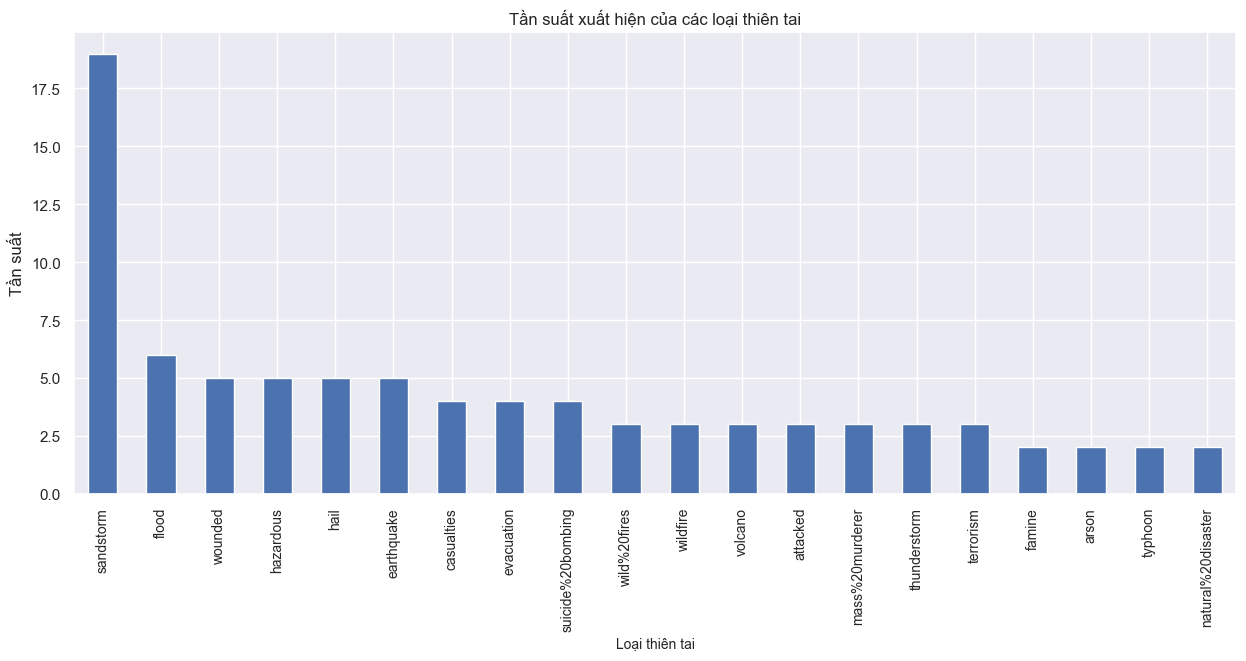

In [70]:
plt.figure(figsize=(15, 6))
keywords_counts.plot(kind='bar')
plt.xlabel('Loại thiên tai',fontsize=10)
plt.ylabel('Tần suất')
plt.title('Tần suất xuất hiện của các loại thiên tai')
plt.xticks(rotation=90,fontsize=10)
plt.show()

#### **Nhận xét:**
- Nhìn vào biểu đồ, ta thấy được các thảm họa thường xảy ra ở United States là Sandstorm (Bão cát), Suicide bombing (Tấn công tự sát bằng bom) và Wounded (bị thương từ thảm họa).
- Ta có thể tìm hiểu một số kiến thức bên ngoài từ tìm hiểu trên, cụ thể:
     - **Bão cát** (hay còn gọi là bão cát sa mạc) là hiện tượng thời tiết mà trong đó gió mạnh mang theo các hạt cát và bụi từ mặt đất, tạo thành một cơn bão cát. Bão cát thường xảy ra ở các vùng sa mạc hoặc khu vực có môi trường khô cằn, thiếu nước và có nhiều cát. Mỹ có nhiều vùng đất rộng lớn thuộc vùng sa mạc hoặc vùng có đặc điểm khí hậu khô cằn, điển hình như sa mạc Mojave, sa mạc Sonora và các khu vực khác ở miền Tây Hoa Kỳ. Điều kiện tự nhiên này, kết hợp với sự hiện diện của cát và bụi trong khu vực, tạo điều kiện thuận lợi cho việc xảy ra bão cát. Hơn nữa, trong một số trường hợp, bão cát có thể được hình thành từ việc kết hợp giữa gió mạnh từ các cơn bão nhiệt đới di chuyển vào đất liền và vùng sa mạc ở Mỹ. Các vùng bờ biển phía Nam của Mỹ, như vùng vịnh Mexico và vùng sa mạc nam California, thường trải qua sự giao thoa giữa các yếu tố thời tiết này, tạo ra điều kiện cho sự hình thành và diễn ra của bão cát.
- United States (Mỹ) là một quốc gia rộng lớn và phát triển, cùng với sự giao lưu văn hóa của nhiều khu vực nên cũng là nơi xảy ra nhiều cuộc xung đột không đáng có dẫn đến thương vong. Kết hợp với các hiện tượng thiên tai tự nhiên vốn có làm cho đất nước này xuất hiện khá nhiều trong bộ dữ liệu với kha khá các lí do và thảm họa khác nhau.

### <font color=#0404B4> Thống kê cột `text` theo số lượng chữ trên dòng, theo câu để kiểm tra có điểm bất thường nào không? </font>

Trước hết, ta sẽ clone dữ liệu ra 2 DataFrame mới để tránh ảnh hưởng đến các phần sau.

In [71]:
train_clone = train_df.copy()
test_clone = test_df.copy()

Ở phần tiền xử lý, ta sẽ lần lượt loại bỏ các từ ngữ không phù hợp và các định dạng không phù hợp. Đầu ra mong muốn là ta chỉ còn giữ lại những từ ngữ đúng chính tả, ngữ pháp, quan trọng và không còn các kí tự dư thừa hoặc từ ngữ dư thừa.

Cụ thể, "dư thừa" ở đây là các đường dẫn url, các thẻ html, các icon - nhãn dán, các dấu câu trong văn bản, ...

In [72]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

In [73]:
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

In [74]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [75]:
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

In [76]:
def keyword_preprocess(text):
    """Clean keyword by removing '%20'"""
    if pd.notnull(text):
        text = text.replace("%20", " ")
    else:
        text = ''
    return text

In [77]:
train_clone['keyword'] = train_clone['keyword'].apply(keyword_preprocess)
test_clone['keyword'] = test_clone['keyword'].apply(keyword_preprocess)

In [78]:
def text_preprocess(df):
    """Clean text by removing url and @someone"""
    df['text'] = df['text'].apply(lambda x: remove_URL(x))
    df['text'] = df['text'].apply(lambda x: remove_html(x))
    df['text'] = df['text'].apply(lambda x: remove_emoji(x))
    df['text'] = df['text'].apply(lambda x: remove_punct(x))
    return df

In [79]:
train_clone=text_preprocess(train_clone)
test_clone=text_preprocess(test_clone)

**Bước 1**: Tạo cột đếm số lượng chữ của cột `text`.

In [80]:
def word_count(sample):
    sample_list=sample.split()
    return len(sample_list)

In [81]:
train_clone['word_count']=train_clone['text'].apply(word_count)

**Bước 2:** Tạo cột số lượng chữ và số lượng chữ trung bình của cột `text`.

In [82]:
train_clone['length']=train_clone['text'].str.len()
train_clone['mean_word_length']=train_clone['text'].map(lambda rev: np.mean([len(word)for word in rev.split()]))

**Bước 3**: Tính số lượng chữ trung bình trên câu.

In [83]:
train_clone['mean_sentence_length']=train_clone['text'].map(lambda rev: np.mean([len(sentence)for sentence in nltk.tokenize.sent_tokenize(rev)]))

**Bước 4**: Trực quan bằng `line chart` và `boxplot`.
- `Boxplot` phù hợp để kiểm tra độ phân bố dữ liệu của các cột số lượng từ, độ dài, số lượng từ trung bình và số lượng từ trung bình trên câu.
- `Line chart` phù hợp để kiểm tra biến động, giúp thể hiện rõ được biến động của lượng tweet 0 và 1 dựa trên số lượng từ, độ dài, số lượng từ trung bình và số lượng từ trung bình trên câu.

In [84]:
def visualize(col):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # Create a figure with a larger size

    sns.boxplot(y=train_clone[col], hue=train_clone['target'], ax=axes[0])  # Plot the boxplot on the left subplot
    axes[0].set_ylabel(col, labelpad=12.5)

    sns.kdeplot(train_clone[train_clone['target'] == 0][col], ax=axes[1], label='0')  # Plot density plot for target=0 on the right subplot
    sns.kdeplot(train_clone[train_clone['target'] == 1][col], ax=axes[1], label='1')  # Plot density plot for target=1 on the right subplot
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Density')
    axes[1].legend()
    
    plt.show()

['word_count', 'length', 'mean_word_length', 'mean_sentence_length']


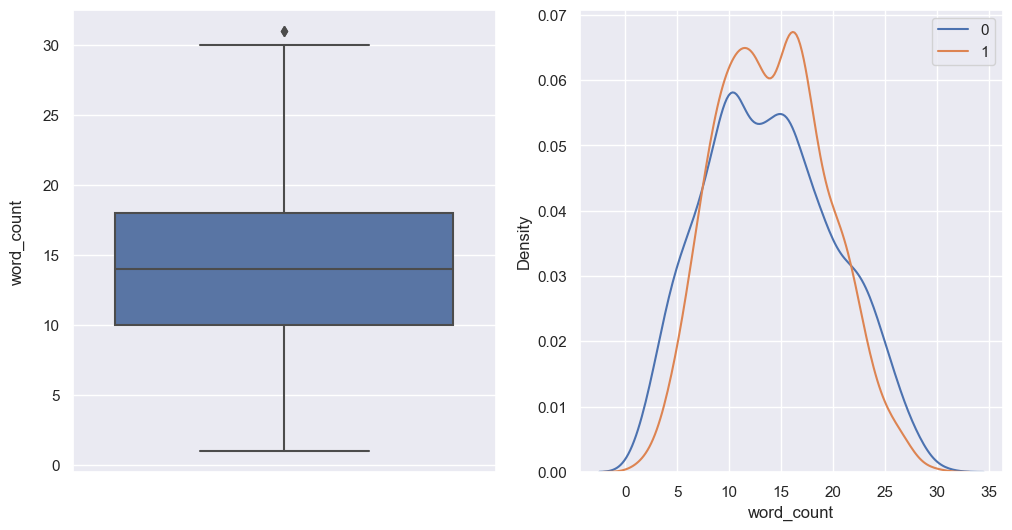

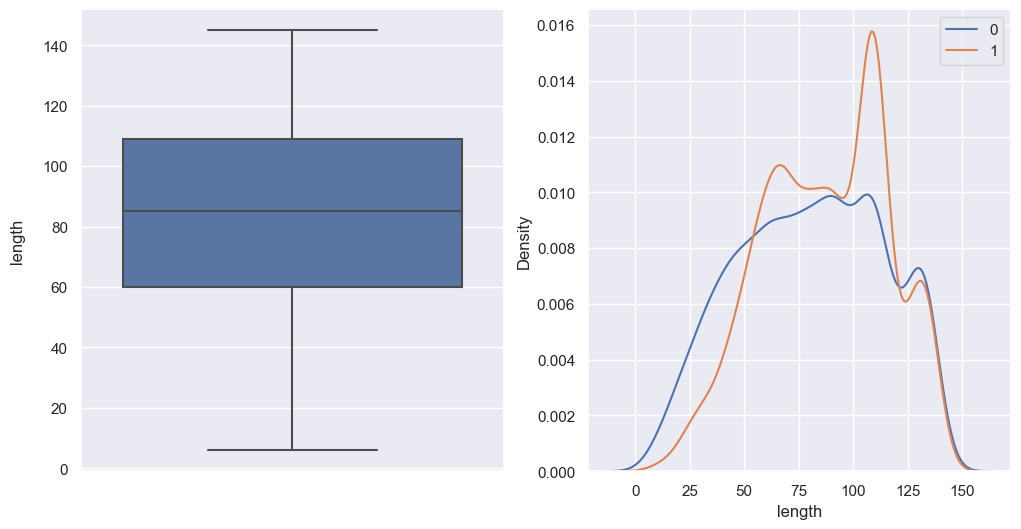

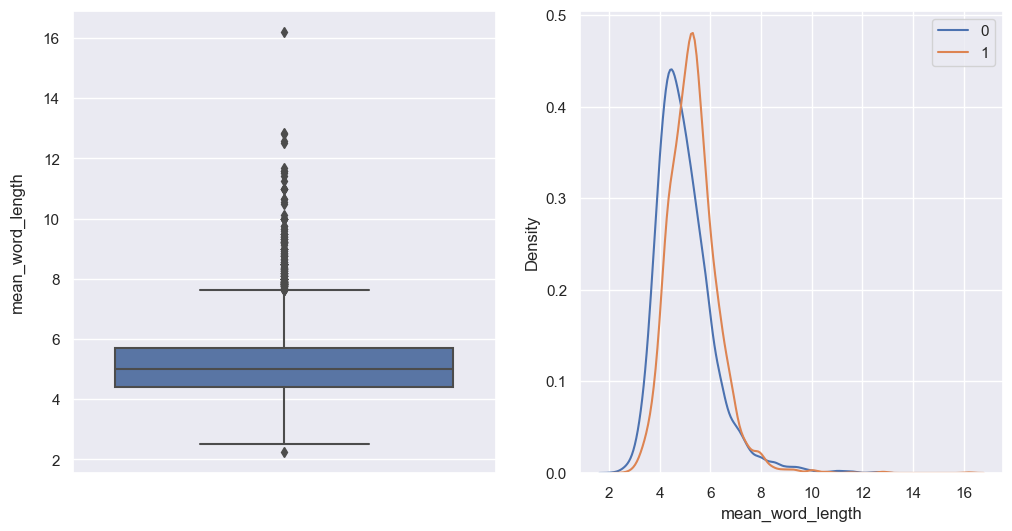

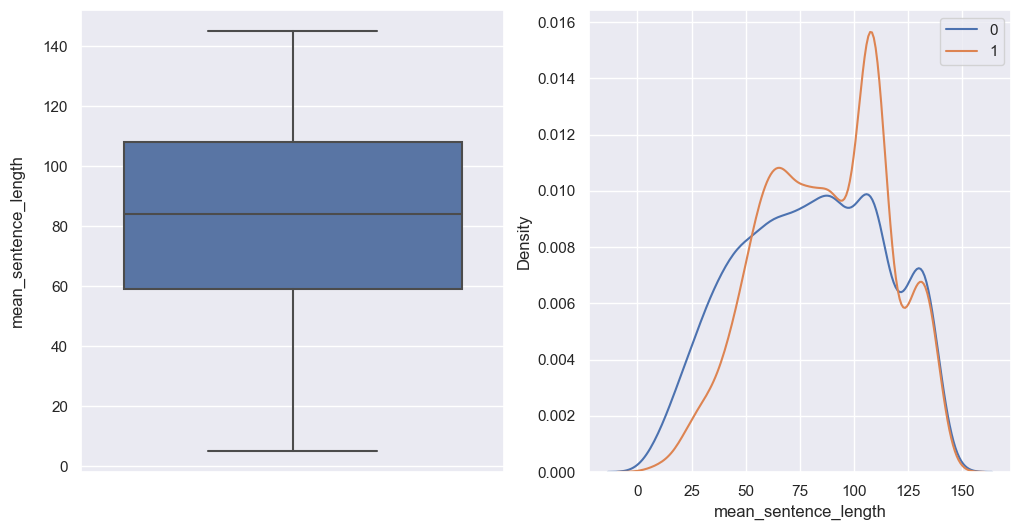

In [85]:
features = train_clone.columns.tolist()[7:]
print(features)
for feature in features:
    visualize(feature)

#### Nhận xét:
- Xét về số từ: 
    - Mỗi tweet trung bình sẽ rơi vào khoảng từ 10 đến gần 20 từ. Các tweet diễn tả thảm họa (1) sẽ có đa số sẽ có tầm hơn 10 đến ít hơn 20 từ, còn đối với các tweet không diễn tả thảm họa (0) sẽ rơi vào khoảng từ 10 đến hơn 20 từ. Ta không thấy được sự khác biệt gì quá lớn giữa so sánh này.
- Xét về chiều dài tweet:
    - Độ dài tweet trung bình từ 60 đến nhỏ hơn 120 (tính theo chiều dài chuỗi). Đối với các tweet có target là 1 thì độ dài phổ biến rơi vào từ khoảng 100 đến 125 cao hơn hẳn so với các tweet có target là 0 (từ 50 đến khoảng nhỏ hơn 125). Ta có thể hiểu theo cách các tweet diễn tả thiên tai thật sự thì thường miêu tả cụ thể và chi tiết hơn so với những tweet bình thường hoặc với giọng văn mang tính giải trí.
- Xét về độ dài trung bình của một từ trong tweet:
    - Một từ sẽ có khoảng từ 4 đến 6 chữ cái, khá tương đương giữa các tweet có target là 1 và 0. Ta không nhìn thấy sự khác biệt ở phần so sánh này và cũng khó đưa ra được suy đoán thú vị nào bởi vì các từ trong tiếng anh có độ dài ngắn khác nhau và cũng không ảnh hưởng đến ngữ nghĩa của từ.
- Xét về chiều dài trung bình của một tweet:
    - Độ dài trung bình này phổ biến từ 60 đến hơn 100 (tính theo chiều dài chuỗi). Có sự khác biệt giữa tweet có target là 1 và target là 0, cụ thể khoảng phổ biến của target là 1 đi từ 100 đến nhỏ hơn 125 cao hơn so với khoảng từ 50 đến dưới 125 của target là 0. Điều này khá dễ nhìn thấy và tương đương với khi ta xét về chiều dài của tweet. 
    
    
Từ những quan sát trên, ta có một suy đoán rằng thường thì những tweet miêu tả về thiên tai thì sự thì sẽ thường khá dài và đối với bộ dữ liệu này là từ khoảng 100 đến 125, với mỗi tweet sẽ có từ khoảng 10 đến 20 từ. Tuy nhiên, đây chỉ là một phát hiện thú vị đối với tập dữ liệu đang quan sát, và ta cũng khá khó khai thác thông tin từ các tương quan này.

### <font color=#0404B4> Tương quan 2 cột `keyword` và `text` để tìm ra mối liên hệ với tweet có target là 1. </font>

**Bước 1**: Trực quan bằng `wordcloud` những dòng có tweet có target là 1.

In [86]:
fpath=("GothamMedium.ttf")

mask = np.array(Image.open("realcloud.png"))
mask=~mask
train_text=train_clone.loc[train_clone['target']==1].text
train_text=list(train_text.values)
text = " ".join(cat for cat in train_text)
word_cloud = WordCloud(stopwords = STOPWORDS,
                        mask = mask, 
                        background_color = 'white',
                        contour_width=15,
                        contour_color='slateblue',
                        font_path=fpath,
                        max_font_size=600,
                        max_words=200,
                        width = mask.shape[0],
                        height = mask.shape[1],
                        colormap='magma'
                        )
word_cloud.generate(text)

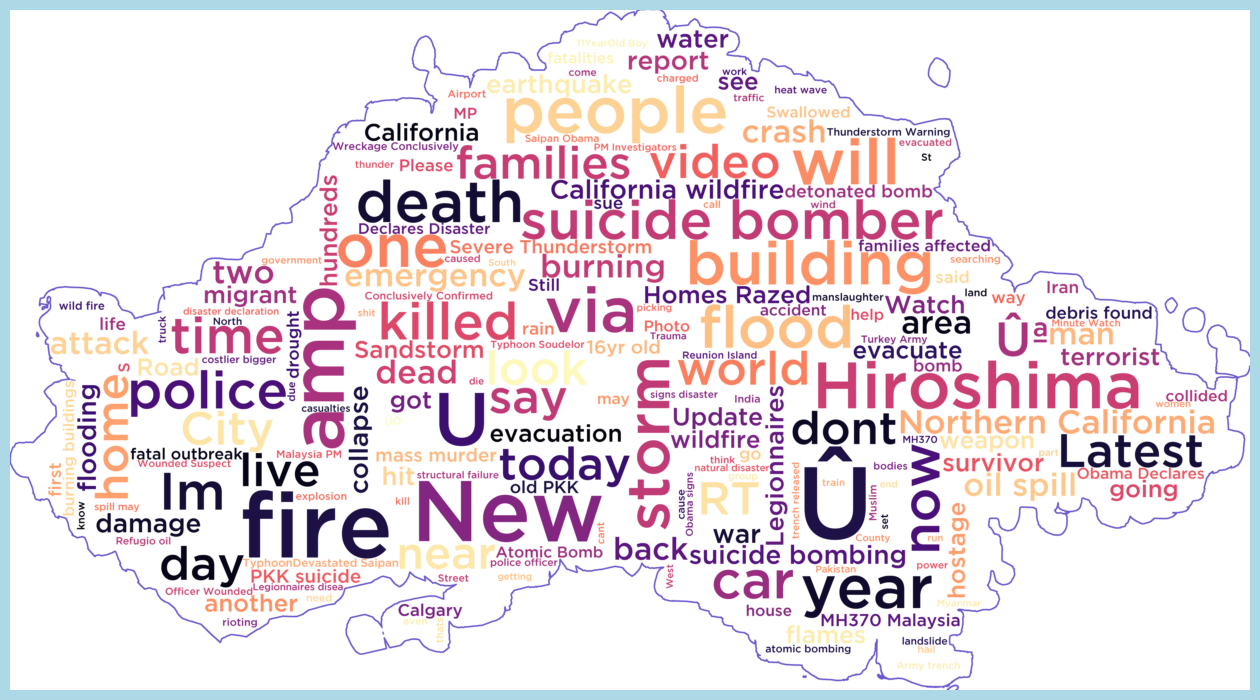

In [87]:
# Display the generated Word Cloud
plt.figure(figsize=(16,9),facecolor='lightblue')
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Bước 2**: Tìm những `keyword` thường xuất hiện cột `text` trên tweet có target là 1.

In [88]:
word_list = word_cloud.process_text(text)

word_df={}
word_df['word']=word_list.keys()
word_df['count']=word_list.values()
word_df=pd.DataFrame(word_df)
word_df=word_df.sort_values('count',ascending=False).head(5000)
keywords_counts = trainTarget1['keyword'].value_counts().sort_values(ascending=False).head(30)
k=[]
for i in keywords_counts.keys():
    word_check=word_df.loc[word_df['word'].str.contains(i)]
    if word_check.shape[0]!=0:
        k.append(i)
k=np.array(k)
k=keywords_counts.keys()
k

Index(['derailment', 'outbreak', 'wreckage', 'debris', 'typhoon',
       'oil%20spill', 'evacuated', 'rescuers', 'suicide%20bomb',
       'suicide%20bombing', 'nuclear%20disaster', 'razed', 'suicide%20bomber',
       'earthquake', 'airplane%20accident', 'collision', 'wildfire',
       'bridge%20collapse', 'casualties', 'drought', 'sandstorm',
       'mass%20murder', 'buildings%20on%20fire', 'evacuation',
       'forest%20fires', 'devastation', 'hostages', 'bombing', 'wild%20fires',
       'sinkhole'],
      dtype='object')

**Bước 3**: Đếm số lượng tweet có target là 0 và 1 dựa trên các keyword.

In [89]:
t0=0
t1=1
for i in k:
    target_counts=train_ex.loc[train_ex['text'].str.contains(i)].target.value_counts()

    for j in target_counts.keys():
        if j == 0:t0+=target_counts[j]
        else:t1+=target_counts[j]


**Bước 4:** Trực quan bằng `Donut chart`. `Donut chart` phù hợp để thể hiện tỉ lệ số lượng tweet 0 và 1 dựa trên các `keyword` đã tìm được.

In [90]:
target=[1,0]
count=[t1,t0]

pie_chart=go.Pie(labels=target,values=count,hole=0.5,pull=[0, .2])

my_layout=go.Layout(title='Biểu đồ biểu diễn tỉ lệ mức độ nghiêm trọng dựa trên các từ đã tương quan',
                    height=500,width=800)
iplot({'data':pie_chart,'layout':my_layout})

**Nhận xét:**
- Tỉ lệ tweet 1 cao hơn tweet 0 cao hơn rất nhiều dựa trên các `keyword` kiếm được. 
> Nhưng liệu có bị `overfit` không khi thực hiện như vậy. Tiếp theo, phần `model` sẽ tiến hành tìm hiểu xem.

<div style="background-color:#0404B4; color:#FFFFFF; font-size:20px; font-family:Verdana; padding:10px; border: 0px solid #19180F; border-radius:10px"> 
    <strong><center>Mô hình hóa</center></strong>
</div>

Ở phần mô hình hóa, do nhóm chia làm 2 team nhỏ để tìm hiểu 2 mô hình khác nhau phục vụ cho việc đa dạng hóa được mô hình và cơ hội nâng điểm nên việc tiền xử lý và tạo đặc trưng sẽ được thực hiện riêng biệt và cũng đôi phần khác nhau.

## <font color=#0404B4> Mô hình học máy (LightGBM và SVM)  </font>
### Giới thiệu chung
#### 1. LightGBM (Light Gradient Boosting Machine):
- **LightGBM (Light Gradient Boosting Machine)** là một thư viện mã nguồn mở cho việc huấn luyện và dự đoán trong các mô hình Gradient Boosting. Nó được phát triển bởi Microsoft Research và là một trong những thư viện Gradient Boosting phổ biến nhất. Thành phần cấu tạo mô hình LightGBM:
    - Decision Tree
    - Gradient Boosting

- **LightGBM** sử dụng các kỹ thuật tối ưu hoá để tăng tốc độ huấn luyện và giảm bộ nhớ sử dụng, bao gồm:

    - Leaf-wise growth (phát triển theo chiều lá): Điều này cho phép LightGBM tập trung vào các lá mang thông tin quan trọng hơn, giúp tăng tốc độ huấn luyện.

    - Gradient-based One-Side Sampling (GOSS): Là một kỹ thuật lấy mẫu để giảm số lượng mẫu được sử dụng trong quá trình huấn luyện mà vẫn đảm bảo độ chính xác của mô hình.

    - Exclusive Feature Bundling (EFB): Là một kỹ thuật để giảm số lượng đặc trưng sử dụng trong quá trình huấn luyện mà vẫn giữ được độ chính xác của mô hình.

#### 2. SVM (Support Vector Machine):

- **SVM (Support Vector Machine)** là một thuật toán học máy phân loại và hồi quy được sử dụng rộng rãi trong các bài toán có dữ liệu tuyến tính và phi tuyến tính. Mô hình SVM tìm cách tạo ra một siêu mặt phẳng (hyperplane) trong không gian đặc trưng sao cho khoảng cách của các điểm dữ liệu gần nhất đến siêu mặt phẳng đó là lớn nhất. Các điểm dữ liệu gần nhất đó được gọi là các vector hỗ trợ (support vectors), và chính vì vậy mô hình SVM còn được gọi là mô hình hỗ trợ vector.

- **Mô hình SVM** có thể xử lý các bài toán phân loại nhị phân (hai lớp) hoặc đa lớp (nhiều lớp) bằng cách sử dụng các phương pháp như One-vs-One hoặc One-vs-All. Mô hình SVM cũng có thể được sử dụng để giải quyết các bài toán hồi quy, trong đó mục tiêu là dự đoán một giá trị liên tục thay vì một nhãn lớp.

- Một số kernel phổ biến trong mô hình SVM:
    - **Kernel tuyến tính (Linear kernel):** Sử dụng khi phân loại dữ liệu là tuyến tính. Kernel này là một hàm tuyến tính đơn giản: K(x, y) = x * y.

    - **Kernel đa thức (Polynomial kernel):** Sử dụng để phân loại dữ liệu phi tuyến tính bằng cách ánh xạ chúng vào một không gian đặc trưng cao hơn. Kernel đa thức được định nghĩa là: K(x, y) = (x * y + r)^d, trong đó d là bậc của đa thức và r là hệ số bù.

    - **Kernel Gaussian (RBF kernel):** Sử dụng để phân loại dữ liệu phi tuyến tính bằng cách ánh xạ chúng vào một không gian đặc trưng cao hơn. Kernel này được định nghĩa là: K(x, y) = exp(-gamma * ||x - y||^2), trong đó gamma là một siêu tham số điều chỉnh độ phức tạp của mô hình.

    - **Kernel Sigmoid:** Sử dụng khi phân loại dữ liệu không tuyến tính. Kernel sigmoid được định nghĩa là: K(x, y) = tanh(alpha * x * y + r), trong đó alpha và r là các siêu tham số.


Trước tiên, để không ảnh hưởng đến mô hình khác, nên ta sẽ sao chép dữ liệu gốc qua các DataFrame mới để tiện cho việc tiền xử lí và chạy mô hình sau này.

In [91]:
train_lightGBM_df=train_df.__deepcopy__()
test_lightGBM_df=test_df.__deepcopy__()

### Tiền xử lý và tạo đặc trưng
Trong thuộc tính `text` của DataFrame ta thấy xuất hiện các thẻ của html nhưng chưa định dạng về đúng, ví dụ: &amp ~ &, &lt ~ <, &gt ~ >
Do đó, ta sẽ xử lý các điểm này đầu tiên.

In [92]:
def decode_html(text):
    return html.unescape(text)

In [93]:
train_lightGBM_df.text=train_lightGBM_df.text.apply(decode_html)
test_lightGBM_df.text=test_lightGBM_df.text.apply(decode_html)

Tiếp đến, ta sẽ xử lý các kí tự không phù hợp và không phục vụ cho việc phân tích và dự đoán. Để tiện cho việc thực hiện, ta sẽ tạo các list và dictionary chứa các kí tự không phù hợp đó.

In [94]:
# Emoticon thường sử dụng
emoticons=['-.-', '-_-', '8)', '8-)', '8-D', '8D', ':!]', ':#', ':$', ':&', ':(', ':)', ':*', ':+', ':-(', ':-)', ':-*', ':-/', ':->', ':-?', ':-D', ':-O', ':-P', ':-]', ':-|', ':-}', ':/', ':3', ':>', ':@', ':D', ':O', ':P', ':]', ':^)', ':c)', ':o)', ':s', ':v', ':|', ':}', ';)', ';-)', '>:(', '<3', '=)', '=3', '=D', '=]', 'B^D', 'C:', 'O.o', '^_^', 'c:', 'o.o', "):", '8:' ,']:']

# Các ký tự viết tắt
truncated_words_dict={"lol" : "laughing out loud","brb" : "be right back","btw" : "by the way","omg" : "oh my god","bff" : "best friend forever","imo" : "in my opinion","irl" : "in real life","lmk" : "let me know","np" : "no problem","nvm" : "nevermind","pls" : "please","thx" : "thanks","u" : "you","ur" : "your","wtf" : "what the fuck","yolo" : "you only live once","tbh" : "to be honest","smh" : "shaking my head","rn" : "right now","fyi" : "for your information","afk" : "away from keyboard","bae" : "before anyone else","bc" : "because","cuz" : "because","def" : "definitely","dunno" : "do not know","gonna" : "going to","gr8" : "great","idk" : "I do not know","ikr" : "I know, right?","jk" : "just kidding","k" : "okay","obv" : "obviously","probs" : "probably","rly" : "really","sry" : "sorry","ttyl" : "talk to you later","yw" : "you are welcome","ig" : "Instagram",}

# Stop words
stop_words = stopwords.words('english')
addstops = ["among", "onto", "shall", "thrice", "thus", "twice", "unto", "us", "would"]
allstops = set(stop_words + addstops)

Ta sẽ xóa hết tất cả những kí tự không phù hợp đó khỏi text bằng hàm `cleanData`.

In [95]:
tokenizer_tweet=TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
regexp= RegexpTokenizer(r'\w+')
lemmatizer=WordNetLemmatizer()

truncated_words_keys=list(truncated_words_dict)
def cleanData(text):
  scripts_remove=["http\S+",        # Xóa địa chỉ web
                  "<.*?>",           # Xóa các tag
                  "- Full.*",       # Các nội dung văn bản có xuất hiện ký tự - Full cho đến hết văn bản là nội dung KHÔNG CẦN THIẾT
                  "[^\x00-\x7F]_?", # Ký tự không thể decode về utf-8
                  "@\w+",           # Xóa các mention
                  "#\w+",           # Xóa các topic
                  "\t",             # Xóa tab
                  "\n"]             # Xóa xuống dòng

  # Xóa ký tự RT ở đầu văn bản
  text = re.sub(r'^RT\s*', ' ', text)

  # Xóa ký tự RT ở giữa văn bản
  text = re.sub(r'\bRT\b', '', text)

  # Thực hiện các thao tác trong scripts_remove
  for script in scripts_remove:
    text = re.sub(script, "", text)

  #  Xóa các khoảng trắng bị thừa
  text = re.sub("\s+", " ", text)
  
  # Loại bỏ ký tự trắng bị thừa ở trước và sau
  text = text.strip()

  # tokenize tweets
  tweet_tokens=tokenizer_tweet.tokenize(text)

  # Thay thế các  các từ viết tắt
  truncated_words=[]
  for word in tweet_tokens:
      if word in truncated_words_keys:
        truncated_words = truncated_words + truncated_words_dict[word].split()
      else:
        truncated_words = truncated_words + word.split()
  text_converted = " ".join(truncated_words)

  # Xóa stop words và các dấu nối câu
  tweet_tokens=tokenizer_tweet.tokenize(text_converted)
  text_clean_stop_words=[]
  for word in tweet_tokens:
    if (word not in allstops) and (word not in string.punctuation) and (word not in emoticons):
        text_clean_stop_words.append(word)
  return text_clean_stop_words

In [96]:
train_lightGBM_df["text_tokens"]=train_lightGBM_df.text.apply(cleanData)
test_lightGBM_df["text_tokens"]=test_lightGBM_df.text.apply(cleanData)

In [97]:
train_lightGBM_df.head(5)

id keyword city country location  \
0   1     NaN  NaN     NaN      NaN   
1   4     NaN  NaN     NaN      NaN   
2   5     NaN  NaN     NaN      NaN   
3   6     NaN  NaN     NaN      NaN   
4   7     NaN  NaN     NaN      NaN   

                                                                                                                                    text  \
0                                                                  Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all   
1                                                                                                 Forest fire near La Ronge Sask. Canada   
2  All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected   
3                                                                      13,000 people receive #wildfires evacuation orders in California    
4                                               Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school    

   target  \
0       1   
1       1   
2       1   
3       1   
4       1   

                                                                                            text_tokens  
0                                                                  [deeds, reason, may, allah, forgive]  
1                                                         [forest, fire, near, la, ronge, sask, canada]  
2  [residents, asked, shelter, place, notified, officers, evacuation, shelter, place, orders, expected]  
3                                             [13,000, people, receive, evacuation, orders, california]  
4                                                        [got, sent, photo, ruby, smoke, pours, school]

Sau khi xử lý, ta sẽ tiến hành nối các chữ trong `text_tokens` lại thành câu văn hoàn chỉnh.

In [98]:
def remove_punctuation(text):
    text = " ".join([char for char in text if char not in string.punctuation])
    return text

In [99]:
train_lightGBM_df["text_clean"]=train_lightGBM_df.text_tokens.apply(remove_punctuation)
test_lightGBM_df["text_clean"]=test_lightGBM_df.text_tokens.apply(remove_punctuation)

In [100]:
train_lightGBM_df.head(5)

id keyword city country location  \
0   1     NaN  NaN     NaN      NaN   
1   4     NaN  NaN     NaN      NaN   
2   5     NaN  NaN     NaN      NaN   
3   6     NaN  NaN     NaN      NaN   
4   7     NaN  NaN     NaN      NaN   

                                                                                                                                    text  \
0                                                                  Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all   
1                                                                                                 Forest fire near La Ronge Sask. Canada   
2  All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected   
3                                                                      13,000 people receive #wildfires evacuation orders in California    
4                                               Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school    

   target  \
0       1   
1       1   
2       1   
3       1   
4       1   

                                                                                            text_tokens  \
0                                                                  [deeds, reason, may, allah, forgive]   
1                                                         [forest, fire, near, la, ronge, sask, canada]   
2  [residents, asked, shelter, place, notified, officers, evacuation, shelter, place, orders, expected]   
3                                             [13,000, people, receive, evacuation, orders, california]   
4                                                        [got, sent, photo, ruby, smoke, pours, school]   

                                                                                 text_clean  
0                                                            deeds reason may allah forgive  
1                                                     forest fire near la ronge sask canada  
2  residents asked shelter place notified officers evacuation shelter place orders expected  
3                                        13,000 people receive evacuation orders california  
4                                                    got sent photo ruby smoke pours school

Sau đó, ta sẽ tiến hành sửa các từ bị lỗi chính tả. Đa số các từ chưa được tối ưu và chính xác, cụ thể:
- Số lượng nhiều.
- Trong 1 từ  bị thiếu hoặc dư nhiều chữ

Do đó làm cho việc xác định, chỉnh sửa tốn thời gian, sẽ có hiện tượng tìm nhầm từ khác với nội dung ban đầu của người viết.

In [101]:
spell = SpellChecker(language="en")
def correct_spellings(text):
    words_list=tokenizer_tweet.tokenize(text)
    corrected_text = []
    for word in words_list:
        if word in spell.unknown(words_list):
            word_corrected=spell.correction(word)
            corrected_text.append(word_corrected if word_corrected is not None else '')
        else:
            corrected_text.append(word)
    text_corrected = " ".join(corrected_text)
    return text_corrected

Thực hiện kiểm tra chính tả các từ trong câu:

*Cell dưới đã được chạy trong lần đầu tiên và lưu kết quả vào file `train_corrected_text` và `test_corrected_text` để tiết kiệm thời gian*

In [102]:
# train_lightGBM_df["Tweet"]=train_lightGBM_df.text_clean.apply(correct_spellings)
# test_lightGBM_df["Tweet"]=test_lightGBM_df.text_clean.apply(correct_spellings)

# train_lightGBM_df.to_csv("train_corrected_text.csv",index=False)
# test_lightGBM_df.to_csv("test_corrected_text.csv",index=False)

In [103]:
train_lightGBM_df=pd.read_csv("train_corrected_text.csv")
test_lightGBM_df=pd.read_csv("test_corrected_text.csv")

Ta tiếp tục chuẩn hóa các từ về dạng chuẩn như bên dưới:

In [104]:
alphabets = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]
prepositions = ["about", "above", "across", "after", "against", "among", "around", "at", "before", "behind", "below", "beside", "between", "by", "down", "during", "for", "from", "in", "inside", "into", "near", "of", "off", "on", "out", "over", "through", "to", "toward", "under", "up", "with"]
prepositions_less_common = ["aboard", "along", "amid", "as", "beneath", "beyond", "but", "concerning", "considering", "despite", "except", "following", "like", "minus", "onto", "outside", "per", "plus", "regarding", "round", "since", "than", "till", "underneath", "unlike", "until", "upon", "versus", "via", "within", "without"]
coordinating_conjunctions = ["and", "but", "for", "nor", "or", "so", "and", "yet"]
correlative_conjunctions = ["both", "and", "either", "or", "neither", "nor", "not", "only", "but", "whether", "or"]
subordinating_conjunctions = ["after", "although", "as", "because", "before", "if", "lest", "once", "only", "since", "so", "supposing", "that", "than", "though", "till", "unless", "until", "when", "whenever", "where", "whereas", "wherever", "while"]
additional_stops = alphabets + prepositions + prepositions_less_common + coordinating_conjunctions + correlative_conjunctions + subordinating_conjunctions

def nomalize_text(text):
  if not (text is np.nan):
    # Rút gọn từ về dạng gốc
    text_spacy = " ".join([lemmatizer.lemmatize(word) for word in regexp.tokenize(text)])

    # Xóa các từ có chữ số
    word_list_non_alpha = [word for word in regexp.tokenize(text_spacy) if word.isalpha()]
    text_non_alpha = " ".join(word_list_non_alpha)
    
    # Xóa các stopwords
    text_remove_addi_stopwords= " ".join([word for word in regexp.tokenize(text_non_alpha) if word not in additional_stops])
    return text_remove_addi_stopwords
  return np.nan

In [105]:
nltk.download('wordnet')
train_lightGBM_df["Tweet_nomalize_text"]=train_lightGBM_df.Tweet.apply(nomalize_text)
test_lightGBM_df["Tweet_nomalize_text"]=test_lightGBM_df.Tweet.apply(nomalize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Sắp xếp lại các cột cho dễ quan sát. Bên dưới sẽ là kết quả đầu ra của quá trình tiền xử lý và tạo đặc trưng. Với cột `Tweet_normalize_text` là cột sau khi đã thực hiện tiền xử lý và cũng là đặc trưng mới.

- DataFrame `train_lightGBM_df` của dữ liệu đã được huấn luyến 

In [106]:
train_lightGBM_df=train_lightGBM_df[['id', 'keyword', 'location', 'text', 'text_tokens','text_clean', 'Tweet', 'Tweet_nomalize_text', 'target']]
train_lightGBM_df.head(5)

id keyword location  \
0   1     NaN      NaN   
1   4     NaN      NaN   
2   5     NaN      NaN   
3   6     NaN      NaN   
4   7     NaN      NaN   

                                                                                                                                    text  \
0                                                                  Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all   
1                                                                                                 Forest fire near La Ronge Sask. Canada   
2  All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected   
3                                                                      13,000 people receive #wildfires evacuation orders in California    
4                                               Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school    

                                                                                                                  text_tokens  \
0                                                                              ['deeds', 'reason', 'may', 'allah', 'forgive']   
1                                                                 ['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada']   
2  ['residents', 'asked', 'shelter', 'place', 'notified', 'officers', 'evacuation', 'shelter', 'place', 'orders', 'expected']   
3                                                       ['13,000', 'people', 'receive', 'evacuation', 'orders', 'california']   
4                                                                ['got', 'sent', 'photo', 'ruby', 'smoke', 'pours', 'school']   

                                                                                 text_clean  \
0                                                            deeds reason may allah forgive   
1                                                     forest fire near la ronge sask canada   
2  residents asked shelter place notified officers evacuation shelter place orders expected   
3                                        13,000 people receive evacuation orders california   
4                                                    got sent photo ruby smoke pours school   

                                                                                      Tweet  \
0                                                            deeds reason may allah forgive   
1                                                      forest fire near la range ask canada   
2  residents asked shelter place notified officers evacuation shelter place orders expected   
3                                               people receive evacuation orders california   
4                                                    got sent photo ruby smoke pours school   

                                                                     Tweet_nomalize_text  \
0                                                          deed reason may allah forgive   
1                                                        forest fire la range ask canada   
2  resident asked shelter place notified officer evacuation shelter place order expected   
3                                             people receive evacuation order california   
4                                                 got sent photo ruby smoke pours school   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

- DataFrame `test_lightGBM_df` của dữ liệu cần phân loại với đầu ra và đặc trưng tương tự như với DataFrame của tập huấn luyện.

In [107]:
test_lightGBM_df.head(5)

id keyword location  \
0   0     NaN      NaN   
1   2     NaN      NaN   
2   3     NaN      NaN   
3   9     NaN      NaN   
4  11     NaN      NaN   

                                                                                               text  \
0                                                                Just happened a terrible car crash   
1                                  Heard about #earthquake is different cities, stay safe everyone.   
2  there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all   
3                                                          Apocalypse lighting. #Spokane #wildfires   
4                                                     Typhoon Soudelor kills 28 in China and Taiwan   

                                                                                    text_tokens  \
0                                                      ['happened', 'terrible', 'car', 'crash']   
1                                  ['heard', 'different', 'cities', 'stay', 'safe', 'everyone']   
2  ['forest', 'fire', 'spot', 'pond', 'geese', 'fleeing', 'across', 'street', 'cannot', 'save']   
3                                                                    ['apocalypse', 'lighting']   
4                                     ['typhoon', 'soudelor', 'kills', '28', 'china', 'taiwan']   

                                                      text_clean  \
0                                    happened terrible car crash   
1                      heard different cities stay safe everyone   
2  forest fire spot pond geese fleeing across street cannot save   
3                                            apocalypse lighting   
4                         typhoon soudelor kills 28 china taiwan   

                                                           Tweet  \
0                                    happened terrible car crash   
1                      heard different cities stay safe everyone   
2  forest fire spot pond geese fleeing across street cannot save   
3                                            apocalypse lighting   
4                                 typhoon  kills 28 china taipan   

                                      Tweet_nomalize_text  
0                             happened terrible car crash  
1                 heard different city stay safe everyone  
2  forest fire spot pond goose fleeing street cannot save  
3                                     apocalypse lighting  
4                               typhoon kill china taipan

### Chuẩn bị mô hình

Ta sẽ chia tập dữ liệu được huấn luyện thành 2 tập train - test.

In [108]:
X_train, X_test, y_train, y_test = train_test_split(np.array(train_lightGBM_df["Tweet_nomalize_text"]),
                                                    np.array(train_lightGBM_df["target"]), 
                                                    test_size=0.25, 
                                                    random_state=42)

In [109]:
X_test

array(['new weapon cause unimaginable destruction',
       'thing got soaked deluge going pad tampon thanks',
       'it col police catch pickpocket liverpool street', ...,
       'mass murderer che greeting woman north korea',
       'woman flower printed shoulder handbag cross body metal chain satchel bag blue',
       'nuclear bomb terrible weapon'], dtype=object)

Transform dữ liệu bằng phương pháp TF-IDF trước khi đưa vào mô hình.

In [110]:
from nltk import word_tokenize
tfidf = TfidfVectorizer(use_idf=True, tokenizer=word_tokenize,min_df=0.00002,max_df=0.70)
X_train_tf = tfidf.fit_transform(X_train.astype('U'))
X_test_tf = tfidf.transform(X_test.astype('U'))

print(f"TF_IDF Model: Train features shape:{X_train_tf.shape} and Test features shape:{X_test_tf.shape}")

C:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



TF_IDF Model: Train features shape:(5709, 8281) and Test features shape:(1904, 8281)


### Huấn luyện mô hình

Chạy thử với các mô hình: SVM và LightGBM

In [111]:
lgb = LGBMClassifier(random_state=42)
svc = SVC(random_state=42)

clfs = {
    "LightGBM": lgb,
    "Support Vector Machine":svc,
}

for name,clf in clfs.items():
    clf.fit(X_train_tf, y_train)
    y_pred = clf.predict(X_test_tf)
    accuracy = accuracy_score(y_pred, y_test)
    print(name, " - accuracy: ", accuracy)


LightGBM  - accuracy:  0.7752100840336135
Support Vector Machine  - accuracy:  0.7993697478991597


### Chạy mô hình

Giữa 2 model cổ điển, ta chọn SVM để dự đoán dữ liệu đề cho.

In [112]:
X_test_ = np.array(test_lightGBM_df["Tweet_nomalize_text"])
print(len(X_test_))
X_test_tf_ = tfidf.transform(X_test_.astype('U'))
print(X_test_tf_.shape)
# Dự đoán
y_hat = clf.predict(X_test_tf_)

3263
(3263, 8281)


In [113]:
id = test_lightGBM_df['id']
id = id.astype('int64')
Submission = pd.DataFrame({'id':id,
                           'target':y_hat})
display(Submission.head())

id  target
0   0       1
1   2       0
2   3       1
3   9       0
4  11       1

Lưu thành file bài nộp theo mẫu.

In [114]:
Submission.to_csv('Submission_1.csv', index=False)

## <font color=#0404B4> BERT (Bidirectional Encoder Representations from Transformers) </font>
### Giới thiệu chung
- **BERT** là một kiến trúc mạng nơ-ron sử dụng trong lĩnh vực xử lý ngôn ngữ tự nhiên (NLP). BERT được giới thiệu bởi Google vào năm 2018 và đã đạt được nhiều thành công đáng kể trong nhiều nhiệm vụ NLP.

- **BERT** sử dụng mô hình Transformer, một kiến trúc mạng nơ-ron mạnh mẽ dựa trên cơ chế tự chú ý (self-attention) để hiểu và biểu diễn ngữ cảnh của các từ trong câu. Điều đặc biệt về BERT là nó thực hiện việc huấn luyện theo cách thức không giám sát (unsupervised learning) trên một lượng lớn dữ liệu từ nguồn Internet. Quá trình này giúp BERT hiểu ngôn ngữ tự nhiên một cách toàn diện và tạo ra các biểu diễn ngữ cảnh phong phú cho các từ và câu.
    - **Transformer** bao gồm hai cơ chế riêng biệt - một bộ mã hóa đọc thông tin đầu vào và một bộ giải mã tạo ra dự đoán cho tác vụ. Vì mục tiêu của BERT là tạo ra một mô hình ngôn ngữ, chỉ cần sử dụng bộ mã hóa. Cách hoạt động chi tiết của Transformer được mô tả trong một bài báo của Google.

    - Khác với các mô hình hướng theo chiều, nghĩa là đọc thông tin đầu vào theo thứ tự tuần tự (từ trái sang phải hoặc từ phải sang trái), bộ mã hóa Transformer đọc toàn bộ chuỗi từ cùng một lúc. Do đó, nó được coi là **hai chiều**, chính xác hơn khi là không hướng. Đặc điểm này cho phép mô hình học ngữ cảnh của một từ dựa trên tất cả các từ xung quanh (bên trái và bên phải của từ).

- Khi huấn luyện các mô hình ngôn ngữ, có một thách thức trong việc xác định mục tiêu dự đoán. Nhiều mô hình dự đoán từ tiếp theo trong một chuỗi (ví dụ: "Học sinh đến trường để ___"), mà cách tiếp cận hướng theo chiều này chỉ hạn chế việc học ngữ cảnh. Do đó, để vượt qua thách thức này, BERT sử dụng hai chiến lược huấn luyện:

    - **Masked Language Model (MLM):** Một số từ trong chuỗi đầu vào được che khuất (thay thế bằng một biểu tượng đặc biệt). BERT cố gắng dự đoán các từ bị che khuất dựa trên ngữ cảnh của chúng trong chuỗi.

    - **Next Sentence Prediction (NSP):** BERT nhận vào hai câu liền kề và phải dự đoán xem chúng có đứng liền sau nhau trong văn bản hay không. Điều này giúp BERT hiểu được mối quan hệ giữa các câu và khả năng dự đoán sự liên kết giữa chúng.

Trước tiên, ta vẫn sẽ sao chép dữ liệu ra 2 DataFrame khác để tiện việc xử lý sau này.

In [115]:
train_BERT_df=train_df.__deepcopy__()
test_BERT_df=test_df.__deepcopy__()

### Tiền xử lý và tạo đặc trưng

Ta sẽ thực hiện việc tiền xử lý đồng thời tạo ra một đặc trưng mới bằng các hàm tiền xử lý đã được viết sẵn ở phần Khám phá dữ liệu phía trên.

In [116]:
train_BERT_df['keyword'] = train_BERT_df['keyword'].apply(keyword_preprocess)
test_BERT_df['keyword'] = test_BERT_df['keyword'].apply(keyword_preprocess)

In [117]:
train_BERT_df=text_preprocess(train_BERT_df)
test_BERT_df=text_preprocess(test_BERT_df)

Sau đó, ta thực hiện nối keyword với text đã được xử lý để tạo thành một đặc trưng mới là `keyword_text`.

In [118]:
# combine keyword and text
train_BERT_df['keyword_text'] = train_BERT_df.apply(lambda row: row['keyword'] + ' ' + row['text'], axis=1)
test_BERT_df['keyword_text'] = test_BERT_df.apply(lambda row: row['keyword'] + ' ' + row['text'], axis=1)

### Chuẩn bị mô hình

In [119]:
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'

 Sử dụng một tokenizer để chia nhỏ văn bản thành các token nhỏ hơn. Phương thức này tải về các tài nguyên cần thiết của mô hình và khởi tạo tokenizer tương ứng.

In [120]:
tokenizer = AutoTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning:

`huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ADMIN\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development



Ta tiến hành chia tập huyến luyện thành 2 tập train và test.

In [121]:
df_train,df_valid=train_test_split(train_BERT_df,test_size=.15,random_state=42)

Tạo một đối tượng DatasetDict và lưu trữ tập train và tập test.

In [122]:
dataset=DatasetDict()
dataset['train']=Dataset.from_pandas(df_train)
dataset['validation']=Dataset.from_pandas(df_valid)
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'keyword', 'city', 'country', 'location', 'text', 'target', 'keyword_text', '__index_level_0__'],
        num_rows: 6471
    })
    validation: Dataset({
        features: ['id', 'keyword', 'city', 'country', 'location', 'text', 'target', 'keyword_text', '__index_level_0__'],
        num_rows: 1142
    })
})

In [123]:
test=DatasetDict()
test['test']=Dataset.from_pandas(test_BERT_df)

Ta tiến hành mã hóa các câu trong `dataset` thành các token. 

In [124]:
def tokenize_sentence(dataset):
    return tokenizer(dataset['keyword_text'],truncation=True,padding=True,max_length=160)

In [125]:
tokenized_sentence=dataset.map(tokenize_sentence,batched=True)
tokenized_sentence

Map:   0%|          | 0/6471 [00:00<?, ? examples/s]

Map:   0%|          | 0/1142 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'keyword', 'city', 'country', 'location', 'text', 'target', 'keyword_text', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 6471
    })
    validation: Dataset({
        features: ['id', 'keyword', 'city', 'country', 'location', 'text', 'target', 'keyword_text', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1142
    })
})

In [126]:
test_input=test.map(tokenize_sentence,batched=True)

Map:   0%|          | 0/3263 [00:00<?, ? examples/s]

In [127]:
tokenized_sentence=tokenized_sentence.rename_column('target','labels')

In [128]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [129]:
class_weights=(1-(df_train['target'].value_counts().sort_index()/len(df_train))).values
class_weights

array([0.42960902, 0.57039098])

In [130]:
# class_weights=torch.from_numpy(class_weights).float().to('cuda')
class_weights=torch.from_numpy(class_weights).float().to('cpu')

In [131]:
class WeightedLossTrainer(Trainer):
    def compute_loss(self,model,inputs,return_outputs=False):
        outputs=model(**inputs)
        logits=outputs.get('logits')
        labels=inputs.get('labels')
        loss_func=nn.CrossEntropyLoss(weight=class_weights)
        loss=loss_func(logits,labels)
        return (loss,outputs) if return_outputs else loss

In [132]:
model = AutoModelForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL_NAME,
                                                           num_labels=2)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [133]:
# from sklearn.metrics import f1_score
def compute_metrics(eval_preds):
    metric = load_metric("f1")
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

### Huấn luyện mô hình

In [134]:
from transformers import TrainingArguments
batch_size=64
logging_steps=100
output_dir='output'
training_args=TrainingArguments(output_dir=output_dir,
                                num_train_epochs=10,
                                learning_rate=2e-5,
                                per_device_train_batch_size=batch_size,
                                per_device_eval_batch_size=batch_size,
                                weight_decay=0.01,
                                evaluation_strategy='epoch',
                                load_best_model_at_end=True,
                                logging_steps=logging_steps,
                                save_strategy = "epoch")

In [135]:
trainer=WeightedLossTrainer(model=model,
                            args=training_args,
                            compute_metrics=compute_metrics,
                            train_dataset=tokenized_sentence['train'],
                            eval_dataset=tokenized_sentence['validation'],
                            tokenizer=tokenizer)

In [136]:
trainer.train()

C:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\optimization.py:411: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2088\1697536512.py:3: FutureWarning:

load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate



TrainOutput(global_step=1020, training_loss=0.20240958695318184, metrics={'train_runtime': 17191.938, 'train_samples_per_second': 3.764, 'train_steps_per_second': 0.059, 'total_flos': 1928681119105800.0, 'train_loss': 0.20240958695318184, 'epoch': 10.0})

In [137]:
import tensorflow as tf
y_test_predict = trainer.predict(test_input['test'])
y_test_logits = y_test_predict.predictions
y_test_probabilities = tf.nn.softmax(y_test_logits)
y_test_pred_labels = np.argmax(y_test_probabilities, axis=1)

### Lưu mô hình

In [138]:
trainer.save_model('saved_model')

Xuất file theo mẫu để nộp.

In [139]:
submit_df={'id':test_df.id,
           'target':y_test_pred_labels}
submit_df=pd.DataFrame(submit_df)

In [140]:
submit_df.to_csv('submission_2.csv', index = False)

<div style="background-color:#0404B4; color:#FFFFFF; font-size:20px; font-family:Verdana; padding:10px; border: 0px solid #19180F; border-radius:10px"> 
    <strong><center>Kết quả</center></strong>
</div>

## <font color=#0404B4> Kết quả trên Leaderboard  </font>

Tính đến thời điểm hiện tại (1/7/2023) thì nhóm đang ở vị trí 101 (101/1049), nếu trừ đi các nhóm đã đạt được Perfect score thì nhóm hiện đang trong top 6% của Leaderboard.

![Result](1.png)  

## <font color=#0404B4> Kết luận  </font>

- Cuộc thi này đã cung cấp cho nhóm một góc nhìn mới về việc xử lí ngôn ngữ tự nhiên, cách tiền xử lí và làm sạch dữ liệu trước khi đưa vào mô hình. Tuy nhiên, do chưa có nhiều kinh nghiệm, nên nhóm xử lí còn khá đơn sơ và không được tối ưu đối với một số phần.

- Đối với các mô hình, hầu như đều nhận lại kết quả khá tốt (từ khoảng 0.79 đến 0.83), tuy nhiên ta có một số quan sát như sau:
    - **BERT:** Đối với mô hình này, nhóm đánh giá là mang lại hiệu quả tốt (0.83) hơn hẳn so với 2 mô hình học máy còn lại, BERT có khả năng hiểu ngữ cảnh và ý nghĩa của từng từ trong câu bằng cách sử dụng phương pháp Masked language modeling và Next sentence prediction do đó thường cho hiệu suất tốt trong việc phân loại văn bản, đặc biệt là trong các tác vụ phức tạp và có yêu cầu cao về hiểu ngữ nghĩa. BERT không yêu cầu phải xử lý - làm sạch văn bản trước khi đi vào huấn luyện. Tuy nhiên thời gian huấn luyện lâu hơn so với các mô hình khác (Khi nhóm chạy trên máy local thì thời gian hoàn thành thời giao động từ 3 đến 4 giờ).
    - **SVM và LightGBM**: Hai mô hình học máy này vẫn đem lại hiệu quả tốt nhưng vẫn không bằng BERT, vì BERT là một hình chuyên dùng để phân loại văn bản. Tuy nhiên thời gian xử lí khá nhanh và điều này lại khá phù hợp với các tập dữ liệu lớn. Và do không phải là mô hình chuyên phân loại văn bản nên việc tiền xử lý để làm sạch các text khá phức tạp, tương đương với các text càng rõ nghĩa và sạch thì kết quả dự đoán càng chính xác hơn.